# Importing Libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands and show multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC

custom_palette = ['#103c60', '#ff5444']



# First Dataset

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()
df.info()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
# checking class balance
len(df[df["class"] == 'Positive'])
len(df[df["class"] == 'Negative'])

320

200

## Preparing train and test sets

### Remove duplicates and check for irregularities

In [4]:
# Group vars
continuous_vars = ['Age']
categorical_vars = [col for col in df.columns if col != 'Age']


# Checking for bad data
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

# Check Age for outliers
Q1 = df[continuous_vars].quantile(0.25)
Q3 = df[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[continuous_vars] < (Q1 - 1.5 * IQR)) | (df[continuous_vars] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:", outliers.sum())


df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned[(df_cleaned['Age'] >= (Q1['Age'] - 1.5 * IQR['Age'])) & (df_cleaned['Age'] <= (Q3['Age'] + 1.5 * IQR['Age']))]

Duplicates: 269
NULLS: 0
NAs: 0
Outliers: 4


In [5]:
# check original distribution
print(df.groupby(['Gender', 'class']).size())
df_cleaned.describe()

Gender  class   
Female  Negative     19
        Positive    173
Male    Negative    181
        Positive    147
dtype: int64


,Age
count,249.000000
mean,48.554217
std,12.082298
min,16.000000
25%,39.000000
50%,48.000000
75%,58.000000
max,79.000000


#### Summary of high level view
Numerical variables look good, duplicates and outliers removed

## EDA
We will now take a closer look at the variables

### Age  distribution by class

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='class', ylabel='Age'>

Text(0.5, 1.0, 'Distribution of Age by Diabetes Class')

Text(0.5, 0, 'Diabetes Class')

Text(0, 0.5, 'Age')

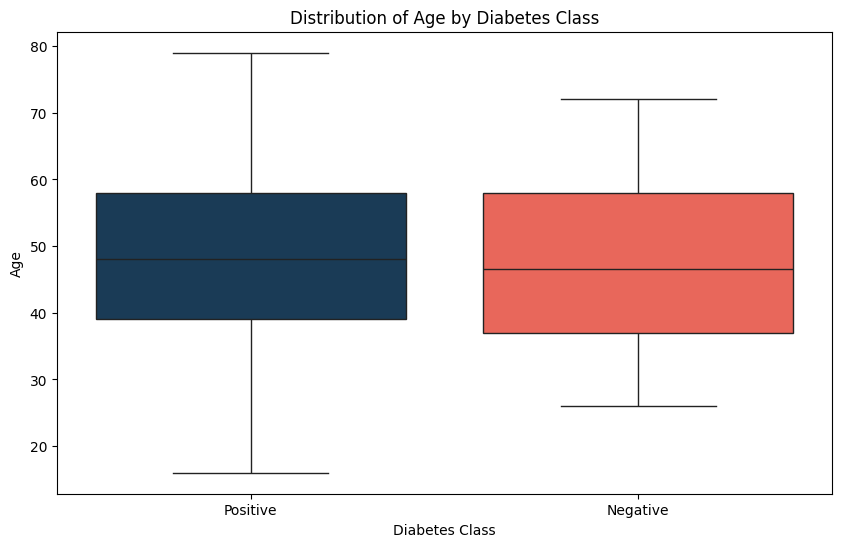

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution for Patients With and Without Diabetes')

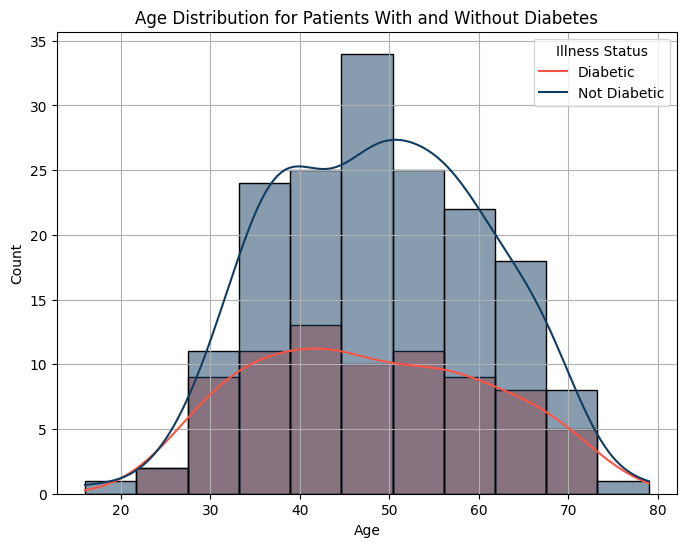

In [6]:
# Ensure necessary columns are present
required_columns = ['class', 'Age', 'Gender']
missing_columns = [col for col in required_columns if col not in df_cleaned.columns]
if missing_columns:
    raise ValueError(f"The DataFrame 'df_cleaned' is missing the following columns: {', '.join(missing_columns)}")

# Boxplot for age distribution by diabetes class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df_cleaned, palette=custom_palette)
plt.title('Distribution of Age by Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='Age', hue='class', kde=True, palette=custom_palette)
plt.legend(title="Illness Status", labels=['Diabetic', 'Not Diabetic'])
plt.title("Age Distribution for Patients With and Without Diabetes")
plt.grid()
plt.show()

### Class count by gender

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Diabetes Status by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

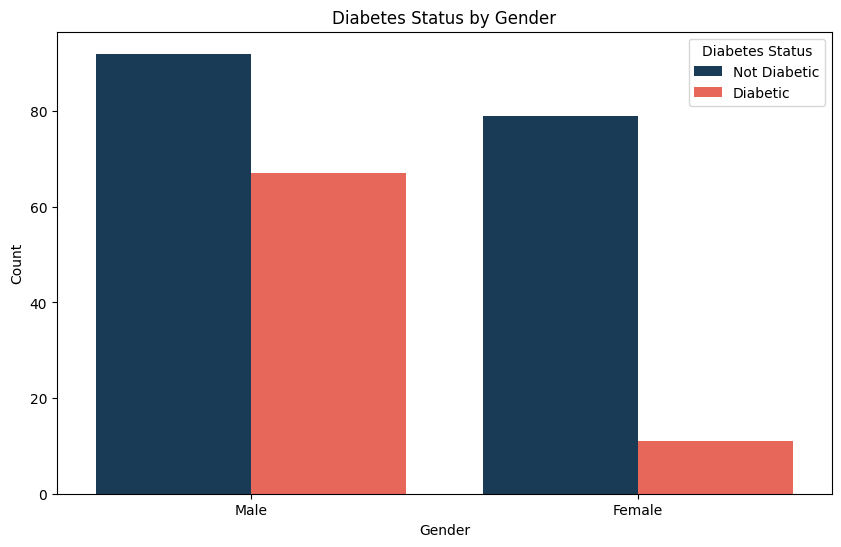

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a count plot for diabetes class split by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='class', data=df_cleaned, palette=custom_palette)
plt.title('Diabetes Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Diabetes Status", labels=['Not Diabetic', 'Diabetic'])
plt.show()




### Data imbalance
There seems to be a large amount of females being non-diabetic. This imabalnce will create some bias in the model, such as the model treating all females as diabetic as this will be 80% accurate

#### Synthetic Minority Oversampling Technique for nominal and continuous (SMOTE-NC)
Generate synthetic data close to minority data points to balance the data through random sampling

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Store original gender labels for post-SMOTE inspection
gender_encoder = LabelEncoder()
df_cleaned['Gender'] = gender_encoder.fit_transform(df_cleaned['Gender'])

for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object' and column != 'Gender':  # Skip encoding 'Gender' as we encoded it manually
        df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

df_cleaned.head()

# Separate Female and Male data
female_data = df_cleaned[df_cleaned['Gender'] == gender_encoder.transform(['Female'])[0]]
male_data = df_cleaned[df_cleaned['Gender'] == gender_encoder.transform(['Male'])[0]]

# Separate features (X) and target (y) for SMOTE
X_female = female_data.drop('class', axis=1)
y_female = female_data['class']

categorical_features = list(range(1,16,1))
# Apply SMOTE-NC to only the Female group
# Initialize SMOTE-NC with categorical feature indices
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=9)
X_resampled_female, y_resampled_female = smote_nc.fit_resample(X_female, y_female)

# from imblearn.over_sampling import ADASYN
# Apply ADASYN to only the Female group
# adasyn = ADASYN(random_state=9)
# X_resampled_female, y_resampled_female = adasyn.fit_resample(X_female, y_female)
# SMOTE-NC gave better model results than ADASYN

# Recombine Female and Male data
X_resampled = pd.concat([X_resampled_female, male_data.drop('class', axis=1)], axis=0)
y_resampled = pd.concat([y_resampled_female, male_data['class']], axis=0)

# Check the new class distribution by gender
df_cleaned = pd.DataFrame(X_resampled)
df_cleaned['class'] = y_resampled
print("New class distribution by gender after oversampling Female-Negative:")
print(df_cleaned.groupby(['Gender', 'class']).size())


resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
# check X data
X_resampled.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


New class distribution by gender after oversampling Female-Negative:
Gender  class
0       0        79
        1        79
1       0        67
        1        92
dtype: int64


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,30,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
1,53,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0
2,50,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
3,50,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0
4,35,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0


## EDA cont.

Now lets continue to examine the data

### Count by symptom and class

<Axes: >

Text(0, 0.5, 'Columns')

Text(0.5, 0, 'Count')

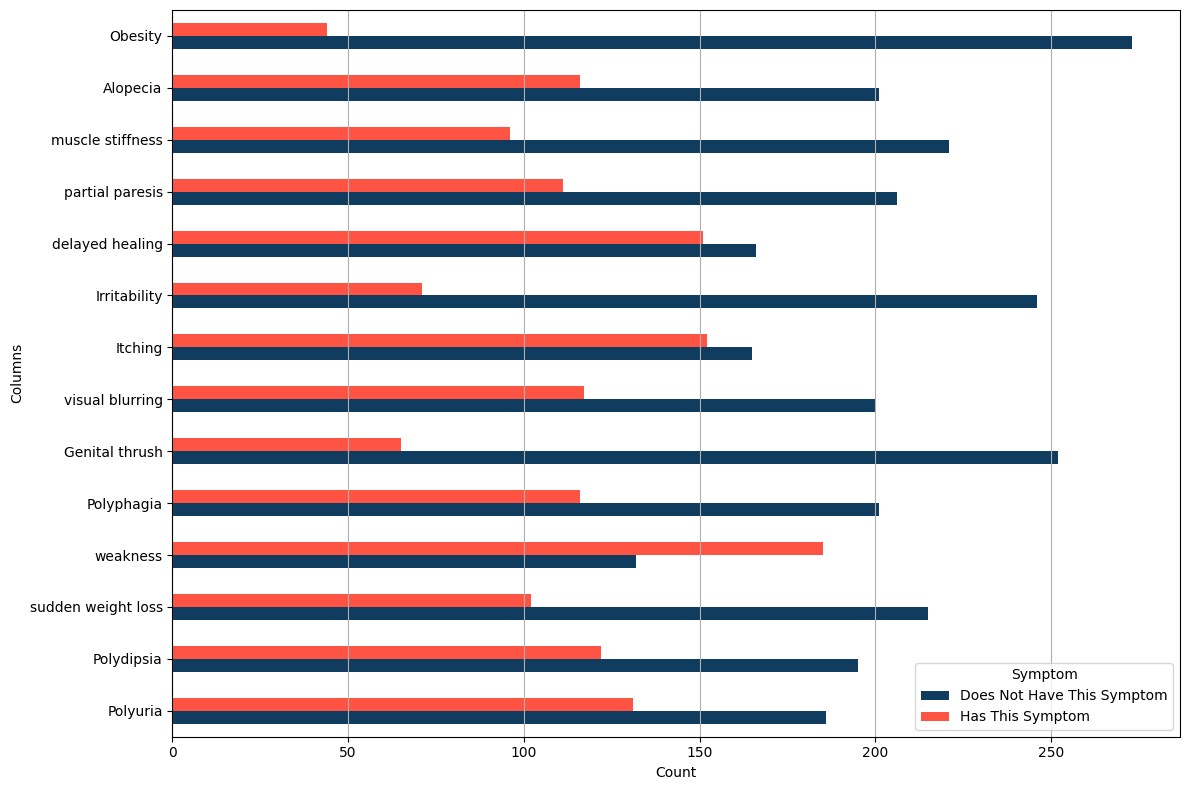

In [9]:
# Binary columns include everything except 'age' and 'gender'
binary_columns = [col for col in df_cleaned.columns if col not in ['Age', 'Gender','class']]
binary_counts = df_cleaned[binary_columns].apply(lambda x: x.value_counts()).T


binary_counts.plot(kind='barh', stacked=False, figsize=(12, 8), color=custom_palette)
plt.ylabel("Columns")
plt.xlabel("Count")
plt.legend(title="Symptom", labels=['Does Not Have This Symptom', 'Has This Symptom'])
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

### Chi-squared Test

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Variable'>

Text(0.5, 1.0, 'Chi-squared Test values for Categorical Variables')

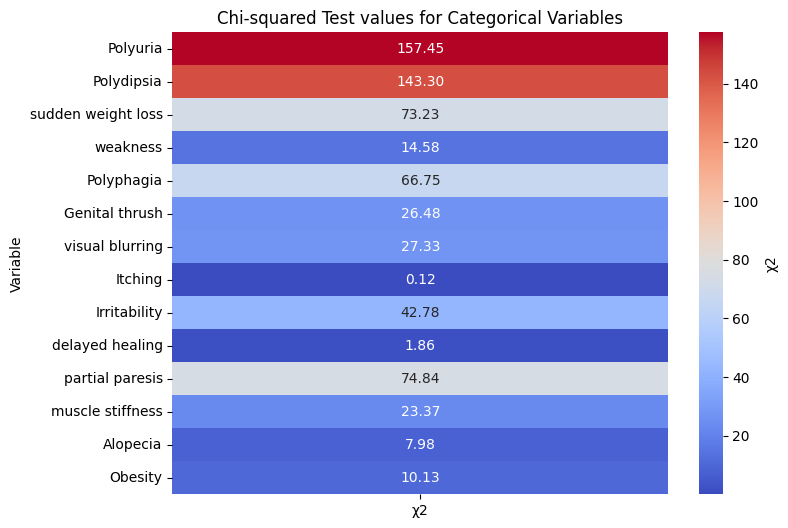

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Variable'>

Text(0.5, 1.0, 'Chi-squared Test p-values for Categorical Variables')

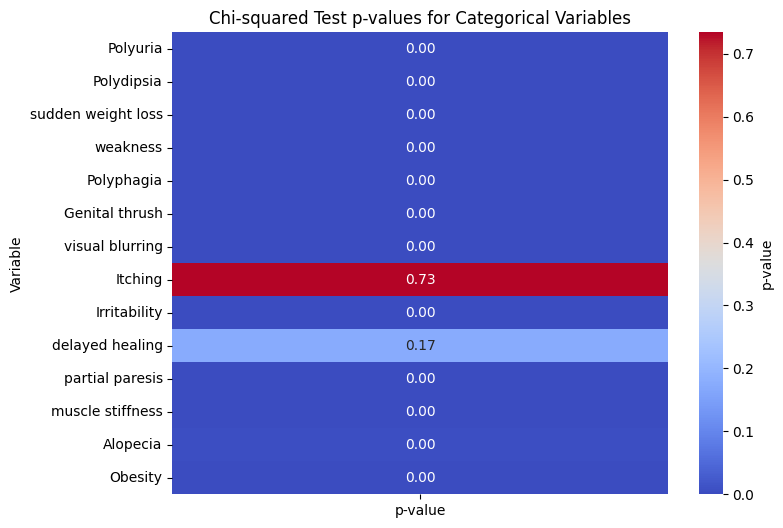

In [10]:

categorical_vars = [col for col in df_cleaned.columns if col not in ['Age', 'Gender','class']]

# Recalculate chi-squared tests
chi2_results,chi2_p = {}, {}

for var in categorical_vars:
    contingency_table = pd.crosstab(df_cleaned[var], df_cleaned['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = chi2  # We'll use p-value for heatmap
    chi2_p[var] = p

# Convert results into a dataframe
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Variable', 'χ2']).set_index('Variable')
chi2_p_df = pd.DataFrame(list(chi2_p.items()), columns=['Variable', 'p-value']).set_index('Variable')

# Plot the heatmap for p-values
plt.figure(figsize=(8, 6))
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'χ2'}, fmt=".2f")
plt.title('Chi-squared Test values for Categorical Variables')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(chi2_p_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'}, fmt=".2f")
plt.title('Chi-squared Test p-values for Categorical Variables')
plt.show()

### Analysis of χ2 test
#### χ2 Results
The larger the chi-squared value, the greater the discrepancy between the observed and expected frequencies, indicating a stronger association.


Variables like "Polyuria" and "Polydipsia" show very high chi-squared values (157.45 and 143.30, respectively), indicating a strong association with the class.


#### p-value results
The lower the p-value, the more statistically significant the association between the variable and the class variable (in this case, likely related to diabetes diagnosis or some other condition).


Most variables have a p-value of 0.00, indicating a strong statistical significance and likely association with the target variable ("class").
The exception is "Itching," which has a high p-value of 0.41, suggesting that this variable is not statistically significant in relation to the class.

<Figure size 1200x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of Polyuria by Class')

Text(0, 0.5, 'Count')

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of Polydipsia by Class')

Text(0, 0.5, 'Count')

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of sudden weight loss by Class')

Text(0, 0.5, 'Count')

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of Polyphagia by Class')

Text(0, 0.5, 'Count')

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of partial paresis by Class')

Text(0, 0.5, 'Count')

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Bar Plot of Irritability by Class')

Text(0, 0.5, 'Count')

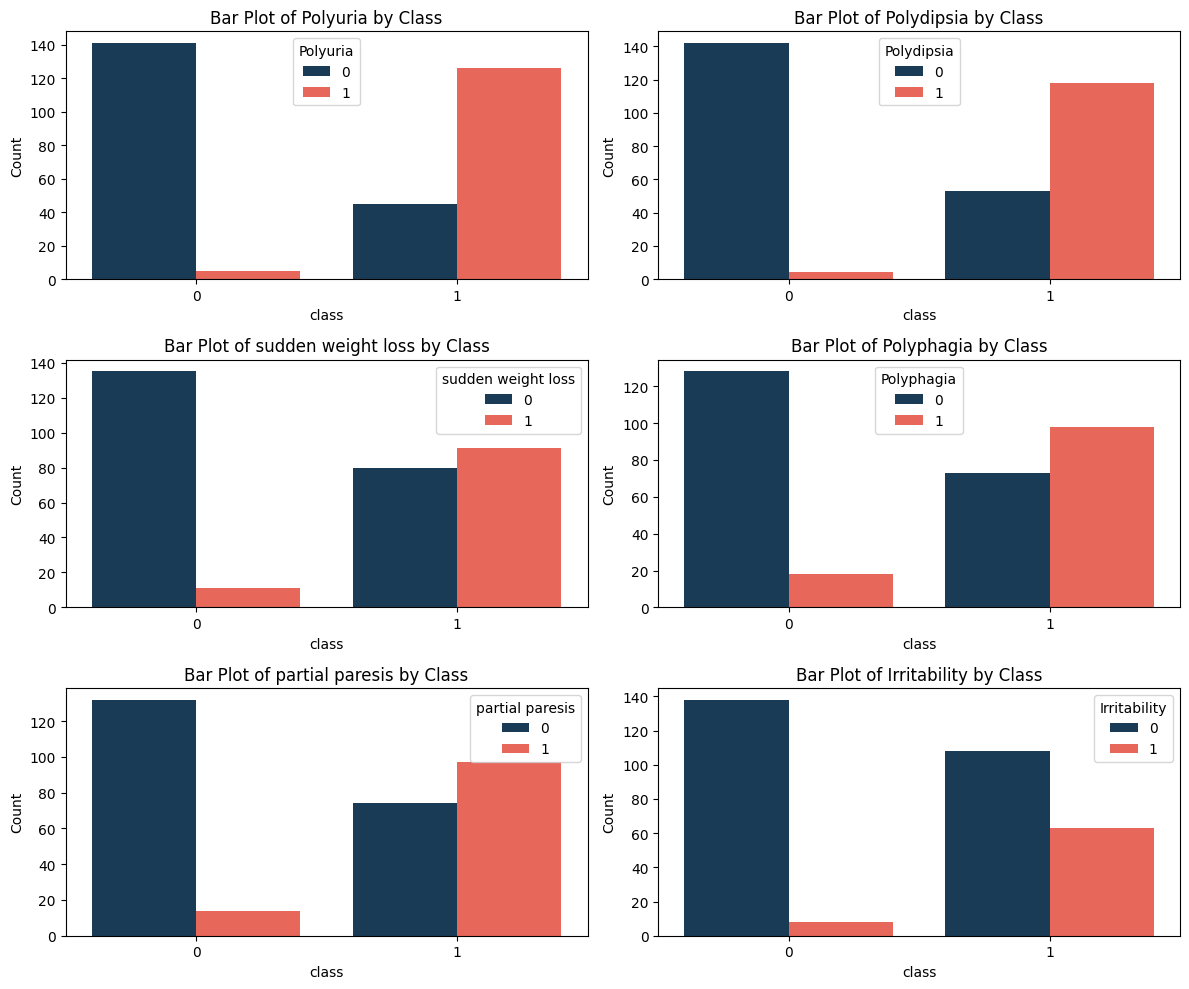

In [11]:
# Important predictors based on chi-squared values
important_predictors = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'partial paresis', 'Irritability']

# Let's create bar plots to visualize the proportion of each binary predictor in relation to the class.

plt.figure(figsize=(12, 10))

for i, predictor in enumerate(important_predictors, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x='class', hue=predictor, data=resampled_data, palette=custom_palette)
    plt.title(f'Bar Plot of {predictor} by Class')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Analysis of Bar plots

As expected, these symptoms are more common in people with diabetes. This is good, as the model is more likely catch this pattern and perform well

In [12]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=9)

## Logistic Regression

### Training initial model

LogisticRegression(max_iter=1000)


Classification Report on test set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.95      0.91      0.93        45

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(120.72222222222221, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(627.9949494949494, 0.5, 'True Label')

Train set accuracy: 0.8959276018099548
Test set accuracy: 0.9375


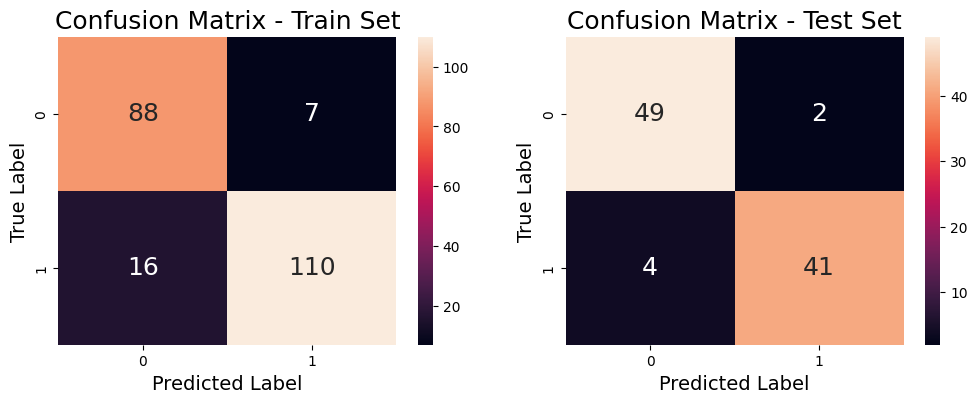

In [13]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the class labels for the test set
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


### Plotting summary of logistic regression model like in R

In [14]:
import statsmodels.api as sm

# Add an intercept to the X_train for the constant term (bias)
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.227475
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  221
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           16
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.6671
Time:                        14:35:16   Log-Likelihood:                -50.272
converged:                       True   LL-Null:                       -151.00
Covariance Type:            nonrobust   LLR p-value:                 4.011e-34
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0471      1.165     -1.758      0.079      -4.330       0.235
Age  

### Excluding insignificant variables < 0.05

Optimization terminated successfully.
         Current function value: 0.227475
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.227595
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.227838
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.229172
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.229951
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.233688
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.238508
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.250825
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.256533
  

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(120.72222222222221, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(627.9949494949494, 0.5, 'True Label')

Train set accuracy: 0.9004524886877828
Test set accuracy: 0.9375


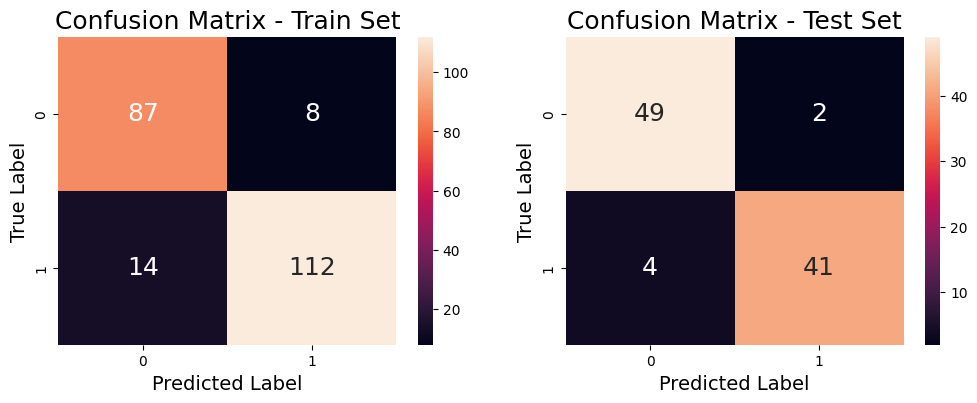

In [15]:
excluded_variables = []

def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)  # Add constant as it is needed for statsmodels logistic regression model
    while True:
        model = sm.Logit(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()  # Get max p-value
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            excluded_feature = p_values.idxmax()
            X = X.drop([excluded_feature], axis=1)
            excluded_variables.append(excluded_feature)
        else:
            break
    return model

# Apply backward elimination
final_model = backward_elimination(X_train, y_train)

# Summary of the final model
print(final_model.summary())

# Predict the probabilities for the train and test sets
X_train_final = X_train.drop(excluded_variables, axis=1)
X_train_final = sm.add_constant(X_train_final)  # Add constant for train set (for statsmodels logistic regression model)
X_test_final = X_test.drop(excluded_variables, axis=1)
X_test_final = sm.add_constant(X_test_final)    # Add constant for test set (for statsmodels logistic regression model)

y_train_prob = final_model.predict(X_train_final)
y_test_prob = final_model.predict(X_test_final)

# Convert probabilities to binary class labels (using 0.5 as the threshold)
y_train_pred = (y_train_prob > 0.5).astype(int)
y_test_pred = (y_test_prob > 0.5).astype(int)


print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))
plt.show()

In [16]:
excluded_variables

['Age',
 'Alopecia',
 'weakness',
 'Obesity',
 'muscle stiffness',
 'delayed healing',
 'visual blurring',
 'sudden weight loss',
 'Irritability']

Both Train (0.89 vs 0.90) and Test (0.94 vs 0.94) accuracies are almost the same for both models so there is no need to exclude insignificant variables since the model will be used to make predictions and not for comparing importance of variables.

## CART (Decision Tree)

### Growing the full tree

DecisionTreeClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.96      0.96      0.96        45

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(120.72222222222221, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(627.9949494949494, 0.5, 'True Label')

Train set accuracy: 0.995475113122172
Test set accuracy: 0.9583333333333334


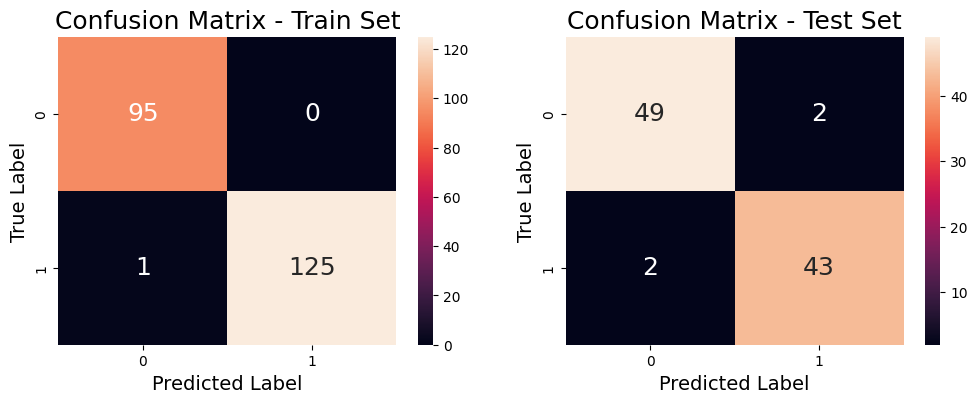

In [17]:
# Initialize the DecisionTreeClassifier (CART)
cart_model = DecisionTreeClassifier(random_state=9)

# Train the model on the training data
cart_model.fit(X_train, y_train)

# Predict the class labels for the test set
y_train_pred = cart_model.predict(X_train)
y_test_pred = cart_model.predict(X_test)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


Train set accuracy is very high (0.995475113122172) while test set accuracy is significantly lower (0.8854166666666666) due to overfitting.

### Finding min CV error

DecisionTreeClassifier(max_depth=1, random_state=9)

DecisionTreeClassifier(max_depth=2, random_state=9)

DecisionTreeClassifier(max_depth=3, random_state=9)

DecisionTreeClassifier(max_depth=4, random_state=9)

DecisionTreeClassifier(max_depth=5, random_state=9)

DecisionTreeClassifier(max_depth=6, random_state=9)

DecisionTreeClassifier(max_depth=7, random_state=9)

DecisionTreeClassifier(max_depth=8, random_state=9)

DecisionTreeClassifier(max_depth=9, random_state=9)

DecisionTreeClassifier(max_depth=10, random_state=9)

DecisionTreeClassifier(max_depth=11, random_state=9)

DecisionTreeClassifier(max_depth=12, random_state=9)

DecisionTreeClassifier(max_depth=13, random_state=9)

DecisionTreeClassifier(max_depth=14, random_state=9)

<Figure size 1000x600 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Train, Test, and Cross-Validation Relative Error vs. Max Depth')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Relative Error (1 - Accuracy)')

([<matplotlib.axis.XTick at 0x1da034cccd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

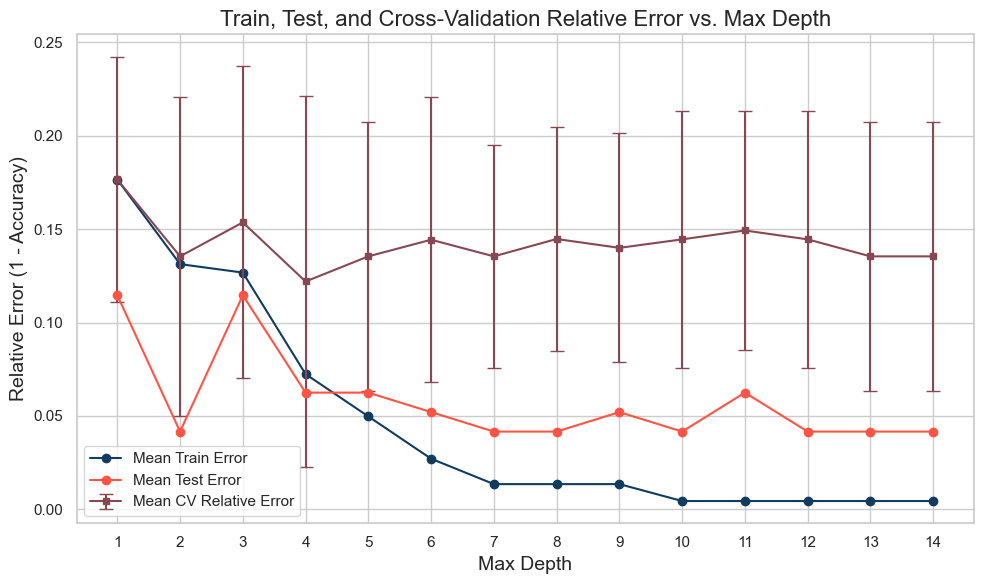

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

mean_train_errors = []
mean_cv_errors = []
std_cv_errors = []
mean_test_errors = []

for depth in range(1, 15):
    cart_model = DecisionTreeClassifier(max_depth=depth, random_state = 9)
    
    # Train the model on the training set
    cart_model.fit(X_train, y_train)
    
    # Calculate training error
    train_predictions = cart_model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_predictions)
    mean_train_errors.append(train_error)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(cart_model, X_train, y_train, cv=10, scoring='accuracy')
    
    # Compute relative errors
    relative_errors_cv = 1 - cv_scores
    
    mean_cv_errors.append(np.mean(relative_errors_cv))
    std_cv_errors.append(np.std(relative_errors_cv))
    
    # Calculate test error
    test_predictions = cart_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_predictions)
    mean_test_errors.append(test_error)
    
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot training error
plt.plot(
    range(1, 15),
    mean_train_errors,
    '-o',
    label='Mean Train Error',
    color=custom_palette[0]
)


# Plot cross-validation error
plt.errorbar(
    range(1, 15),
    mean_cv_errors,
    yerr=std_cv_errors,
    fmt='-s',
    ecolor='#884852',
    capsize=5,
    capthick=1,
    color='#884852',
    markersize=5,
    label='Mean CV Relative Error'
)

# Plot test error
plt.plot(
    range(1, 15),
    mean_test_errors,
    '-o',
    label='Mean Test Error',
    color=custom_palette[1]
)

plt.title('Train, Test, and Cross-Validation Relative Error vs. Max Depth', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Relative Error (1 - Accuracy)', fontsize=14)
plt.xticks(range(1, 15))
plt.legend()
plt.tight_layout()
plt.show()

### Pruning the tree

    Depth  Mean CV Error  Standard Deviation  Mean CV Error + Std Dev
0       1       0.176482            0.065701                 0.242183
1       2       0.135375            0.085248                 0.220623
2       3       0.153557            0.083501                 0.237059
3       4       0.121937            0.099248                 0.221185
4       5       0.135375            0.072118                 0.207494
5       6       0.144269            0.076332                 0.220600
6       7       0.135375            0.059566                 0.194942
7       8       0.144664            0.059871                 0.204535
8       9       0.139921            0.061181                 0.201102
9      10       0.144466            0.068725                 0.213191
10     11       0.149209            0.064095                 0.213305
11     12       0.144466            0.068725                 0.213191
12     13       0.135375            0.072118                 0.207494
13     14       0.13

DecisionTreeClassifier(max_depth=4, random_state=9)


Classification Report for Pruned Tree:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.95      0.91      0.93        45

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train Accuracy of Pruned Tree (depth=4): 0.9276018099547512
Test Accuracy of Pruned Tree (depth=4): 0.9375


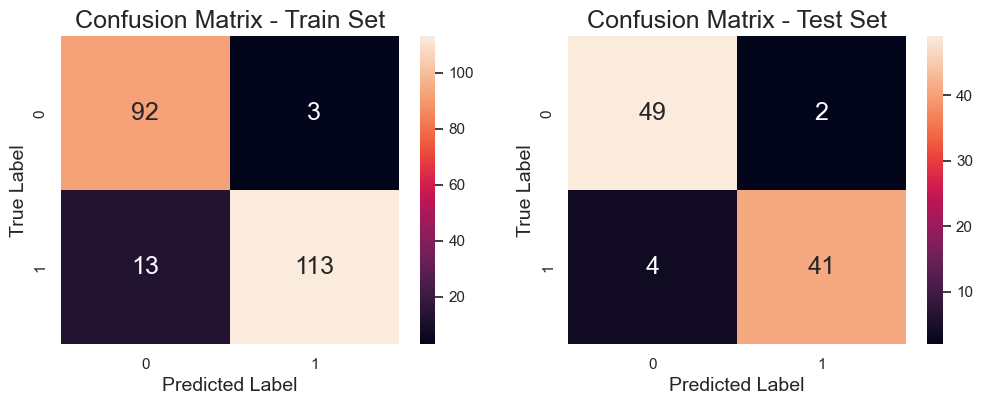

In [19]:
# Assuming mean_cv_errors and std_cv_errors are already populated
depths = list(range(1, 15))  # Depths from 1 to 14
sums = [mean_cv_errors[i - 1] + std_cv_errors[i - 1] for i in depths]

# Create a DataFrame
results_df = pd.DataFrame({
    'Depth': depths,
    'Mean CV Error': mean_cv_errors,
    'Standard Deviation': std_cv_errors,
    'Mean CV Error + Std Dev': sums
})
# Print the DataFrame
print(results_df)

# Identify the depth with the minimum cross-validation error
min_cv_error = np.min(mean_cv_errors)
# find correspoding standard error
min_cv_error_idx = np.argmin(mean_cv_errors)
min_cv_error_std = std_cv_errors[min_cv_error_idx]
# find cv cap
cv_cap = min_cv_error + min_cv_error_std

for depth, error, std in zip(range(1, 15), mean_cv_errors, std_cv_errors):
    if error <= cv_cap:
        optimal_depth1 = depth
        break
        
optimal_depth_min1 = np.argmin(mean_cv_errors) + 1 

print(f'Optimal depth based on least complicated tree with CV error <= CV cap: {optimal_depth1}')
print(f'Optimal depth based on lowest mean CV relative error: {optimal_depth_min1}')
# since optimal depth = 1 and depth with min cv error = 4, use 4 as max_depth of 1 might be too simple

# Train the decision tree using the optimal depth
pruned_cart_model = DecisionTreeClassifier(max_depth=optimal_depth_min1, random_state=9)
pruned_cart_model.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred_pruned = pruned_cart_model.predict(X_train)
y_test_pred_pruned = pruned_cart_model.predict(X_test)

# Print classification report for pruned tree
print("\nClassification Report for Pruned Tree:")
print(classification_report(y_test, y_test_pred_pruned))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test, y_test_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate accuracy for train and test sets
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)
print(f"Train Accuracy of Pruned Tree (depth={optimal_depth_min1}): {train_accuracy_pruned}")
print(f"Test Accuracy of Pruned Tree (depth={optimal_depth_min1}): {test_accuracy_pruned}")
plt.show()

<Figure size 2000x1000 with 0 Axes>

[Text(0.56, 0.9, 'Polyuria <= 0.5\ngini = 0.49\nsamples = 221\nvalue = [95, 126]\nclass = Positive'),
 Text(0.32, 0.7, 'Polydipsia <= 0.5\ngini = 0.401\nsamples = 126\nvalue = [91, 35]\nclass = Negative'),
 Text(0.16, 0.5, 'partial paresis <= 0.5\ngini = 0.313\nsamples = 108\nvalue = [87, 21]\nclass = Negative'),
 Text(0.08, 0.3, 'Obesity <= 0.5\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = Negative'),
 Text(0.04, 0.1, 'gini = 0.191\nsamples = 84\nvalue = [75, 9]\nclass = Negative'),
 Text(0.12, 0.1, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Negative'),
 Text(0.24, 0.3, 'visual blurring <= 0.5\ngini = 0.498\nsamples = 15\nvalue = [7, 8]\nclass = Positive'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Negative'),
 Text(0.28, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Positive'),
 Text(0.48, 0.5, 'muscle stiffness <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [4, 14]\nclass = Positive'),
 Text(0.4, 0.3, 'Obesity <= 0.5\ngini = 0.153\nsa

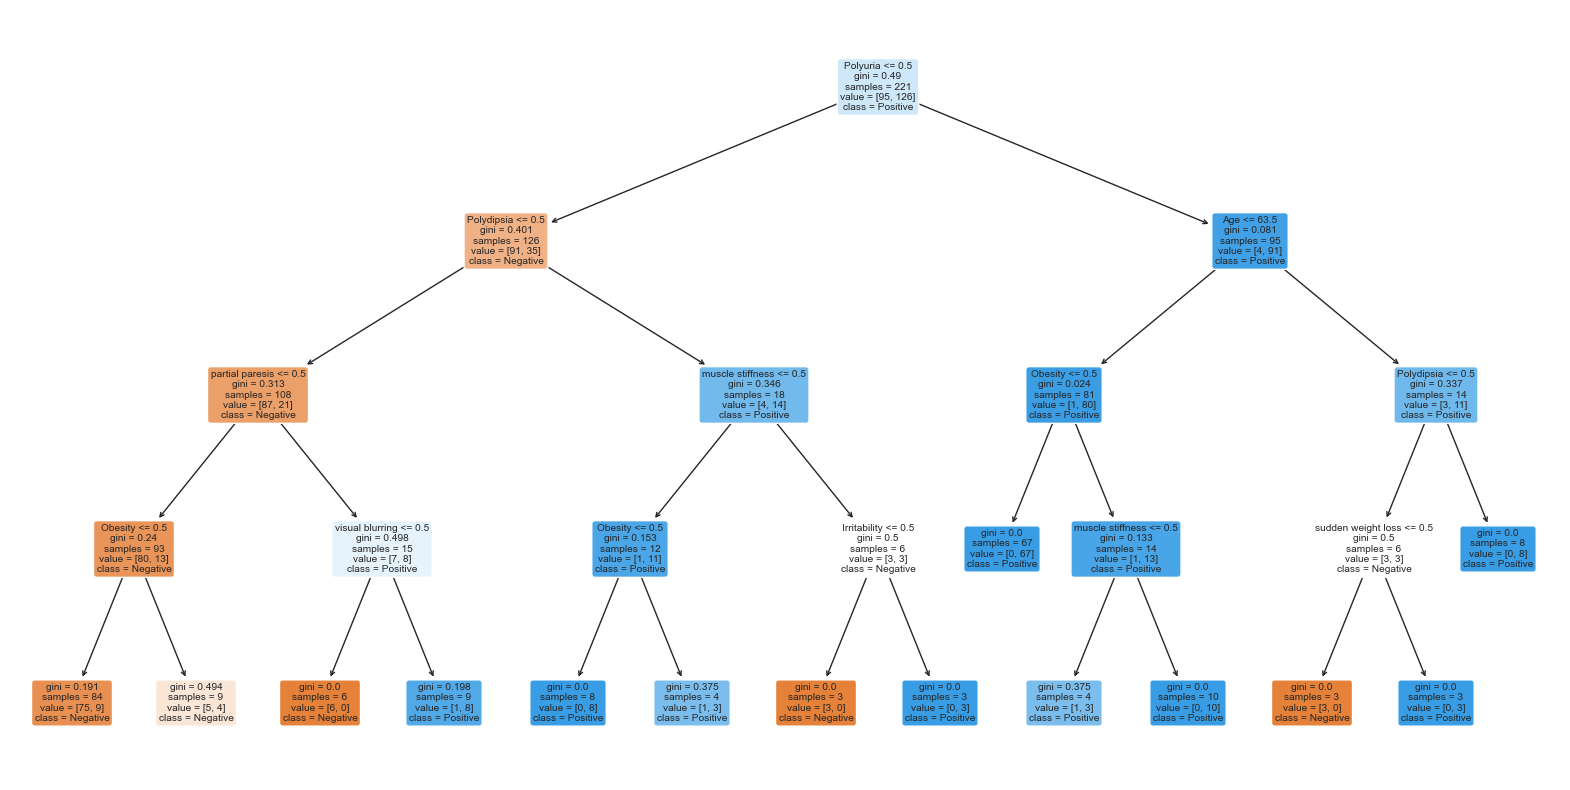

In [20]:
# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot
plot_tree(pruned_cart_model, 
        feature_names= X_train.columns.tolist(),  
          class_names= ['Negative','Positive'],
          filled=True,                        
          rounded=True)                      
plt.show()


               Feature  Importance
2             Polyuria    0.603466
3           Polydipsia    0.147103
8      visual blurring    0.068514
12     partial paresis    0.048187
4   sudden weight loss    0.036131
10        Irritability    0.036131
15             Obesity    0.027715
13    muscle stiffness    0.021028
0                  Age    0.011725
1               Gender    0.000000
5             weakness    0.000000
6           Polyphagia    0.000000
7       Genital thrush    0.000000
9              Itching    0.000000
11     delayed healing    0.000000
14            Alopecia    0.000000


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 16 artists>

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance in CART Model')

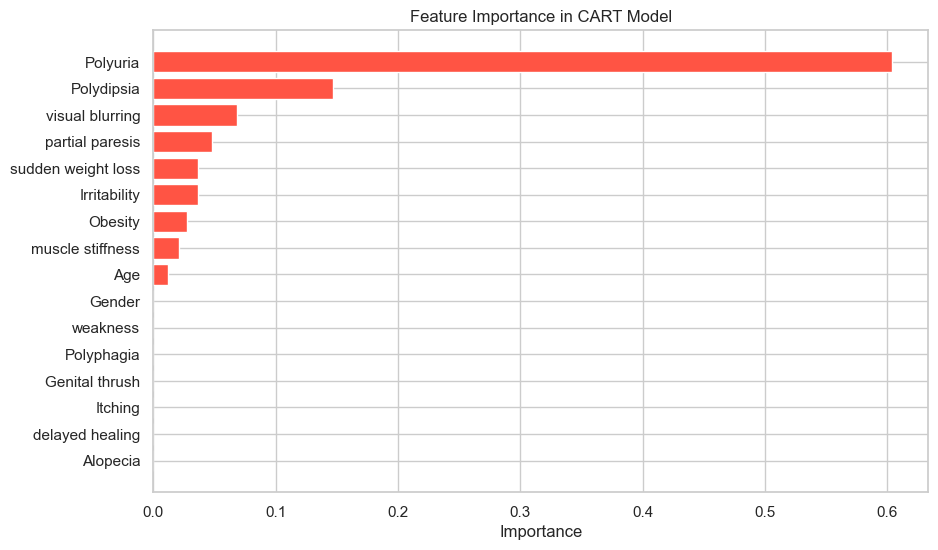

In [21]:
# Get feature importances
feature_importances = pruned_cart_model.feature_importances_

# Display feature importances with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)




# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=custom_palette[1])
plt.xlabel('Importance')
plt.title('Feature Importance in CART Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

## Random Forest

RandomForestClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        45

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.995475113122172
Test set accuracy: 0.9791666666666666


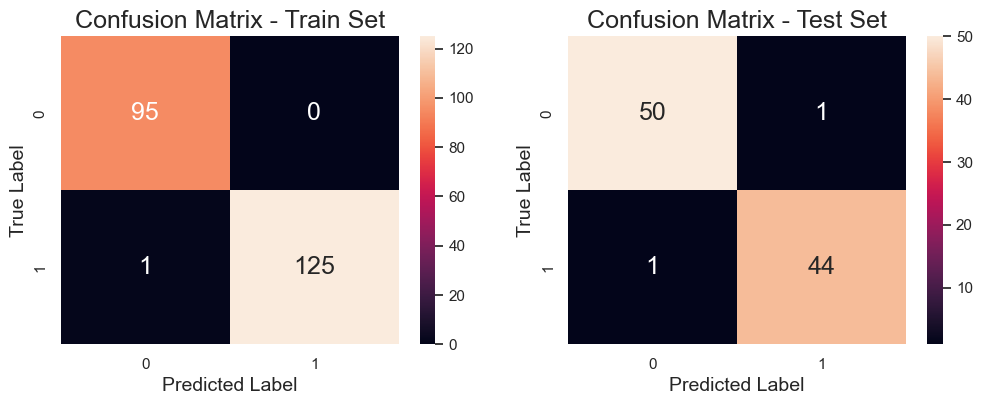

In [22]:

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=9)

# Train the model on the training data and let trees grow fully
rf_model.fit(X_train, y_train)

# Predict the class labels for the test set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)
# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


As both train and test set accuracies are very high with little difference, there is little risk of overfitting.

               Feature  Importance
2             Polyuria    0.251253
3           Polydipsia    0.154187
0                  Age    0.117196
12     partial paresis    0.068803
4   sudden weight loss    0.053747
7       Genital thrush    0.050573
6           Polyphagia    0.045073
8      visual blurring    0.034502
11     delayed healing    0.033197
1               Gender    0.030179
15             Obesity    0.029012
14            Alopecia    0.028555
13    muscle stiffness    0.027047
9              Itching    0.026760
10        Irritability    0.025964
5             weakness    0.023954


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 16 artists>

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest Model')

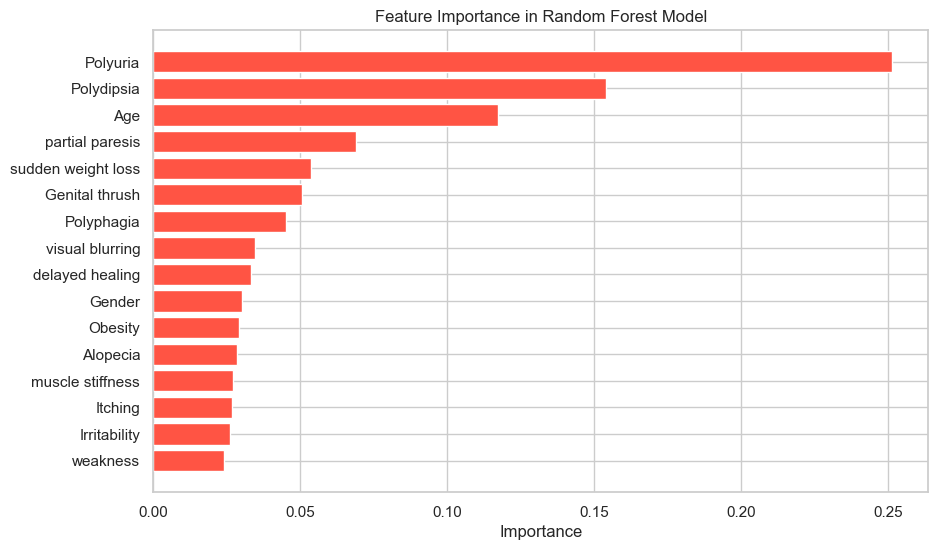

In [23]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=custom_palette[1])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

# Second dataset

## EDA

In [24]:
# Load the dataset
df2 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Display the first few rows of the data to understand its structure
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [25]:
# Checking for missing values, data types, and basic statistics
df2_info = df2.info()
df2_describe = df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [26]:
# recode Dtype of categorical variables
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
df2[df2.columns.difference(numerical_columns)] = df2[df2.columns.difference(numerical_columns)].astype("category")
df2_info = df2.info()
df2_describe = df2.describe()
len(df2[df2["Diabetes_binary"] == 0])
len(df2[df2["Diabetes_binary"] == 1])
print("Duplicates:", df2.duplicated().sum())
print("NULLS:", df2.isnull().sum().sum())
print("NAs:", df2.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  float64 
 5   Smoker                70692 non-null  category
 6   Stroke                70692 non-null  category
 7   HeartDiseaseorAttack  70692 non-null  category
 8   PhysActivity          70692 non-null  category
 9   Fruits                70692 non-null  category
 10  Veggies               70692 non-null  category
 11  HvyAlcoholConsump     70692 non-null  category
 12  AnyHealthcare         70692 non-null  category
 13  NoDocbcCost           70692 non-null  category
 14  GenHlth               70692 non-null  category
 15  Me

35346

35346

Duplicates: 1635
NULLS: 0
NAs: 0


<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 1.0, 'BMI Distribution by Diabetes Status')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Density')

<Axes: xlabel='PhysActivity', ylabel='count'>

Text(0.5, 1.0, 'Physical Activity by Diabetes Status')

Text(0.5, 0, 'Physical Activity (1=Yes, 0=No)')

Text(0, 0.5, 'Count')

<Axes: xlabel='Smoker', ylabel='count'>

Text(0.5, 1.0, 'Smoking Status by Diabetes Status')

Text(0.5, 0, 'Smoking Status (1=Yes, 0=No)')

Text(0, 0.5, 'Count')

<Axes: xlabel='HvyAlcoholConsump', ylabel='count'>

Text(0.5, 1.0, 'Heavy Alcohol Consumption by Diabetes Status')

Text(0.5, 0, 'Heavy Alcohol Consumption (1=Yes, 0=No)')

Text(0, 0.5, 'Count')

<Axes: xlabel='GenHlth', ylabel='count'>

Text(0.5, 1.0, 'General Health by Diabetes Status')

Text(0.5, 0, 'General Health (1=Excellent to 5=Poor)')

Text(0, 0.5, 'Count')

<Axes: xlabel='Age', ylabel='count'>

Text(0.5, 1.0, 'Age Group by Diabetes Status')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

<Axes: xlabel='Fruits', ylabel='count'>

Text(0.5, 1.0, 'Fruit Consumption by Diabetes Status')

Text(0.5, 0, 'Fruit Consumption (1=Yes, 0=No)')

Text(0, 0.5, 'Count')

<Axes: xlabel='Veggies', ylabel='count'>

Text(0.5, 1.0, 'Vegetable Consumption by Diabetes Status')

Text(0.5, 0, 'Vegetable Consumption (1=Yes, 0=No)')

Text(0, 0.5, 'Count')

<Axes: xlabel='Education', ylabel='count'>

Text(0.5, 1.0, 'Education Level by Diabetes Status')

Text(0.5, 0, 'Education Level')

Text(0, 0.5, 'Count')

<Axes: xlabel='Income', ylabel='count'>

Text(0.5, 1.0, 'Income Level by Diabetes Status')

Text(0.5, 0, 'Income Level')

Text(0, 0.5, 'Count')

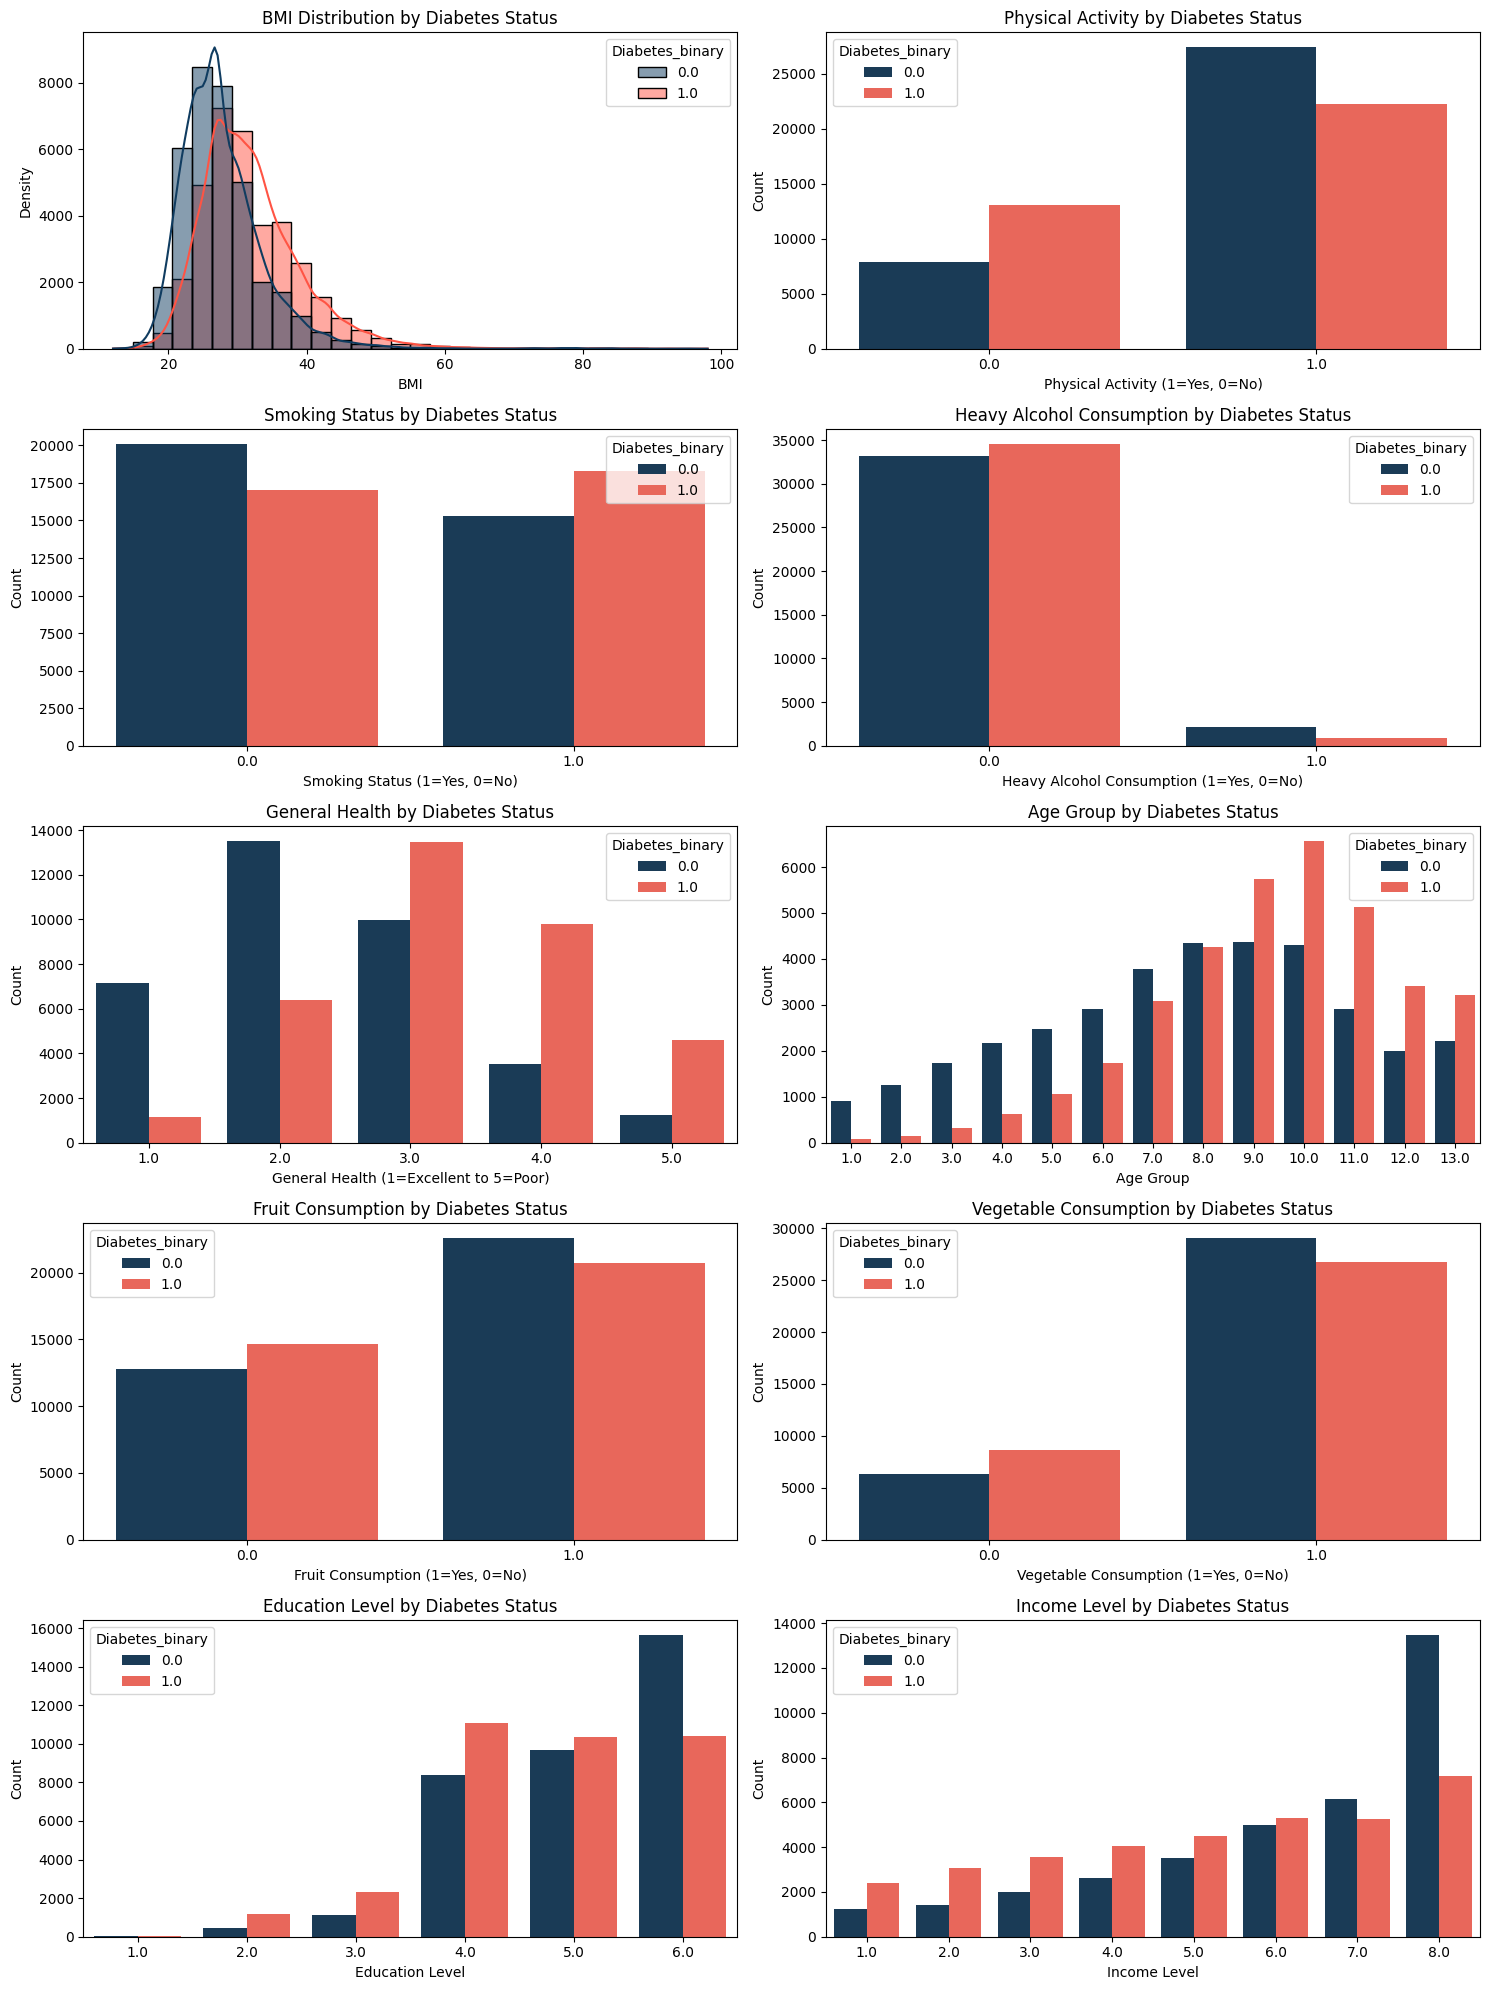

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams["figure.figsize"] = (15, 20)
fig, axes = plt.subplots(5, 2)

# 1. BMI Distribution by Diabetes Status
sns.histplot(data=df2, x='BMI', hue='Diabetes_binary', kde=True, bins=30, ax=axes[0, 0], palette=custom_palette)
axes[0, 0].set_title('BMI Distribution by Diabetes Status')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Density')

# 2. Physical Activity by Diabetes Status
sns.countplot(data=df2, x='PhysActivity', hue='Diabetes_binary', ax=axes[0, 1], palette=custom_palette)
axes[0, 1].set_title('Physical Activity by Diabetes Status')
axes[0, 1].set_xlabel('Physical Activity (1=Yes, 0=No)')
axes[0, 1].set_ylabel('Count')

# Repeat the palette argument for all other subplots
sns.countplot(data=df2, x='Smoker', hue='Diabetes_binary', ax=axes[1, 0], palette=custom_palette)
axes[1, 0].set_title('Smoking Status by Diabetes Status')
axes[1, 0].set_xlabel('Smoking Status (1=Yes, 0=No)')
axes[1, 0].set_ylabel('Count')

sns.countplot(data=df2, x='HvyAlcoholConsump', hue='Diabetes_binary', ax=axes[1, 1], palette=custom_palette)
axes[1, 1].set_title('Heavy Alcohol Consumption by Diabetes Status')
axes[1, 1].set_xlabel('Heavy Alcohol Consumption (1=Yes, 0=No)')
axes[1, 1].set_ylabel('Count')

sns.countplot(data=df2, x='GenHlth', hue='Diabetes_binary', ax=axes[2, 0], palette=custom_palette)
axes[2, 0].set_title('General Health by Diabetes Status')
axes[2, 0].set_xlabel('General Health (1=Excellent to 5=Poor)')
axes[2, 0].set_ylabel('Count')

sns.countplot(data=df2, x='Age', hue='Diabetes_binary', ax=axes[2, 1], palette=custom_palette)
axes[2, 1].set_title('Age Group by Diabetes Status')
axes[2, 1].set_xlabel('Age Group')
axes[2, 1].set_ylabel('Count')

sns.countplot(data=df2, x='Fruits', hue='Diabetes_binary', ax=axes[3, 0], palette=custom_palette)
axes[3, 0].set_title('Fruit Consumption by Diabetes Status')
axes[3, 0].set_xlabel('Fruit Consumption (1=Yes, 0=No)')
axes[3, 0].set_ylabel('Count')

sns.countplot(data=df2, x='Veggies', hue='Diabetes_binary', ax=axes[3, 1], palette=custom_palette)
axes[3, 1].set_title('Vegetable Consumption by Diabetes Status')
axes[3, 1].set_xlabel('Vegetable Consumption (1=Yes, 0=No)')
axes[3, 1].set_ylabel('Count')

sns.countplot(data=df2, x='Education', hue='Diabetes_binary', ax=axes[4, 0], palette=custom_palette)
axes[4, 0].set_title('Education Level by Diabetes Status')
axes[4, 0].set_xlabel('Education Level')
axes[4, 0].set_ylabel('Count')

sns.countplot(data=df2, x='Income', hue='Diabetes_binary', ax=axes[4, 1], palette=custom_palette)
axes[4, 1].set_title('Income Level by Diabetes Status')
axes[4, 1].set_xlabel('Income Level')
axes[4, 1].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Education', ylabel='count'>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Income', ylabel='count'>

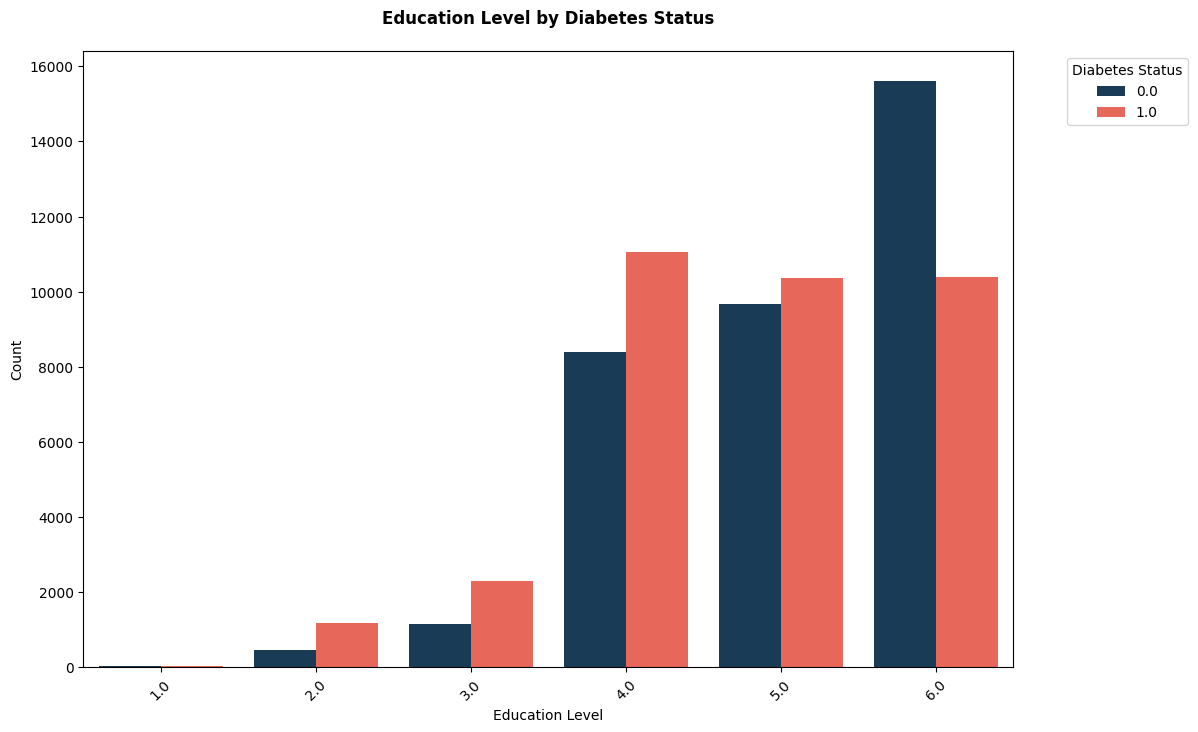

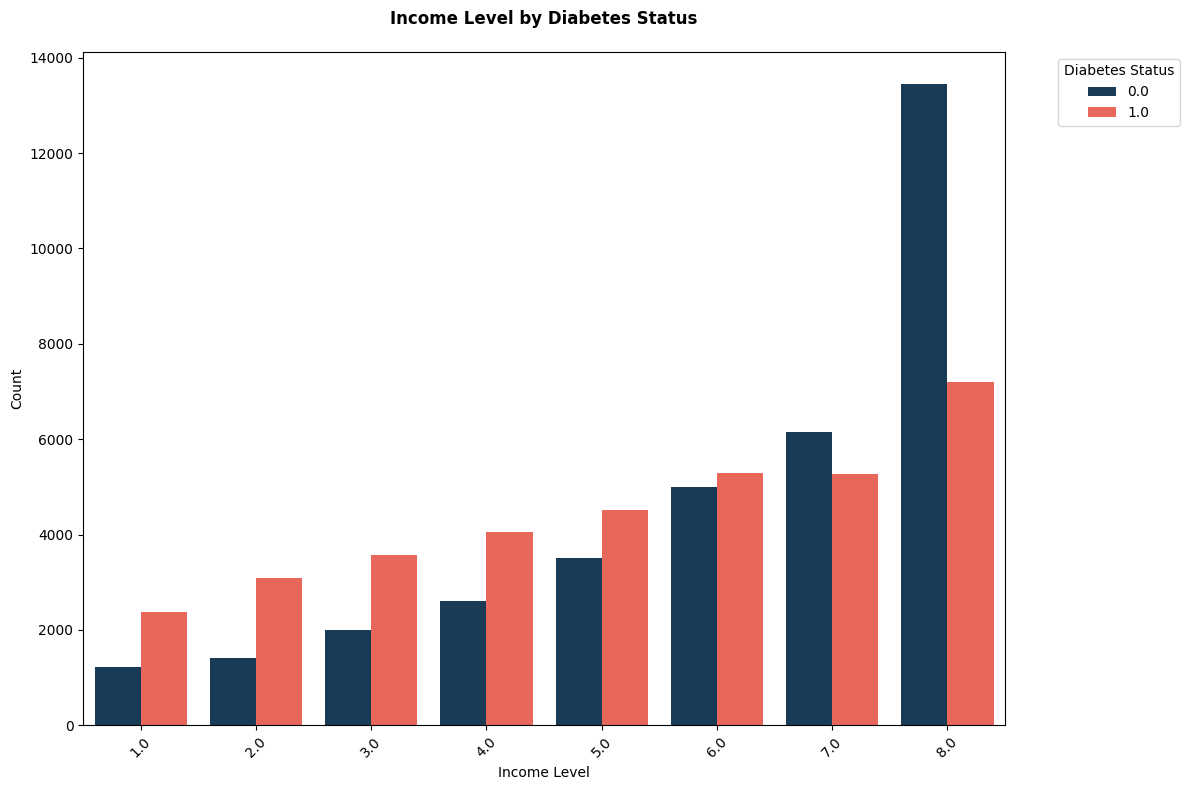

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style and figure size for better visualization
plt.style.use('default')
plt.rcParams["figure.figsize"] = (12, 8)


# Create a function to make the plots more readable
def improve_plot_readability(title, xlabel, ylabel):
    plt.title(title, pad=20, size=12, fontweight='bold')
    plt.xlabel(xlabel, size=10)
    plt.ylabel(ylabel, size=10)
    plt.xticks(rotation=45)
    plt.legend(title='Diabetes Status', bbox_to_anchor=(1.05, 1), loc='upper left')


# 10. Education Level by Diabetes Status
plt.figure()
sns.countplot(data=df2, x='Education', hue='Diabetes_binary', palette=custom_palette)
improve_plot_readability('Education Level by Diabetes Status',
                        'Education Level', 'Count')

# 11. Income Level by Diabetes Status
plt.figure()
sns.countplot(data=df2, x='Income', hue='Diabetes_binary', palette=custom_palette)
improve_plot_readability('Income Level by Diabetes Status',
                        'Income Level', 'Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [29]:
# Calculating correlations to identify highly correlated variables
correlation_matrix = df2.corr()

# Checking for any columns with low variance or unnecessary identifiers
low_variance_columns = [col for col in df2.columns if df2[col].nunique() == 1]

# Display the results
df2_info, df2_describe, correlation_matrix, low_variance_columns

(None,
                 BMI      MentHlth      PhysHlth
 count  70692.000000  70692.000000  70692.000000
 mean      29.856985      3.752037      5.810417
 std        7.113954      8.155627     10.062261
 min       12.000000      0.000000      0.000000
 25%       25.000000      0.000000      0.000000
 50%       29.000000      0.000000      0.000000
 75%       33.000000      2.000000      6.000000
 max       98.000000     30.000000     30.000000,
                       Diabetes_binary    HighBP  HighChol  CholCheck  \
 Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
 HighBP                       0.381516  1.000000  0.316515   0.103283   
 HighChol                     0.289213  0.316515  1.000000   0.085981   
 CholCheck                    0.115382  0.103283  0.085981   1.000000   
 BMI                          0.293373  0.241019  0.131309   0.045648   
 Smoker                       0.085999  0.087438  0.093398  -0.004331   
 Stroke                       0.125427  

## CART

In [30]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[df2.columns.difference(["Diabetes_binary"])], df2["Diabetes_binary"], test_size=0.3, random_state=9)

In [31]:
X_train.info()
y_train.info()
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 151 to 126
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 221 non-null    int64
 1   Gender              221 non-null    int32
 2   Polyuria            221 non-null    int32
 3   Polydipsia          221 non-null    int32
 4   sudden weight loss  221 non-null    int32
 5   weakness            221 non-null    int32
 6   Polyphagia          221 non-null    int32
 7   Genital thrush      221 non-null    int32
 8   visual blurring     221 non-null    int32
 9   Itching             221 non-null    int32
 10  Irritability        221 non-null    int32
 11  delayed healing     221 non-null    int32
 12  partial paresis     221 non-null    int32
 13  muscle stiffness    221 non-null    int32
 14  Alopecia            221 non-null    int32
 15  Obesity             221 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 16.4 KB
<c

### Growing the full tree

DecisionTreeClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     10583
         1.0       0.66      0.65      0.65     10625

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(120.72222222222221, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(627.9949494949494, 0.5, 'True Label')

Train set accuracy: 0.9954732842939131
Test set accuracy: 0.6568276122218031


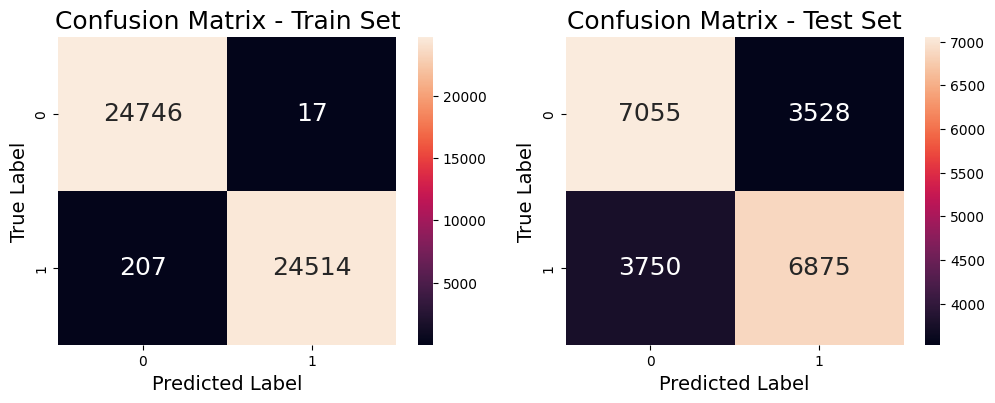

In [32]:
# Initialize the DecisionTreeClassifier (CART)
cart_model2 = DecisionTreeClassifier(random_state=9)

# Train the model on the training data
cart_model2.fit(X_train2, y_train2)

# Predict the class labels for the test set
y_train_pred = cart_model2.predict(X_train2)
y_test_pred = cart_model2.predict(X_test2)

print("\nClassification Report on test set:")
print(classification_report(y_test2, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train2, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test2, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train2, y_train_pred)
test_accuracy = accuracy_score(y_test2, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


As shown by the accuracies and confusion matrices above for train and test sets, there is clearly overfitting as accuracies of train set are much higher than test set.

### Finding min CV error

DecisionTreeClassifier(max_depth=1, random_state=9)

DecisionTreeClassifier(max_depth=2, random_state=9)

DecisionTreeClassifier(max_depth=3, random_state=9)

DecisionTreeClassifier(max_depth=4, random_state=9)

DecisionTreeClassifier(max_depth=5, random_state=9)

DecisionTreeClassifier(max_depth=6, random_state=9)

DecisionTreeClassifier(max_depth=7, random_state=9)

DecisionTreeClassifier(max_depth=8, random_state=9)

DecisionTreeClassifier(max_depth=9, random_state=9)

DecisionTreeClassifier(max_depth=10, random_state=9)

DecisionTreeClassifier(max_depth=11, random_state=9)

DecisionTreeClassifier(max_depth=12, random_state=9)

DecisionTreeClassifier(max_depth=13, random_state=9)

DecisionTreeClassifier(max_depth=14, random_state=9)

<Figure size 1000x600 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Train, Test, and Cross-Validation Relative Error vs. Max Depth')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Relative Error (1 - Accuracy)')

([<matplotlib.axis.XTick at 0x1da0b9f6c90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

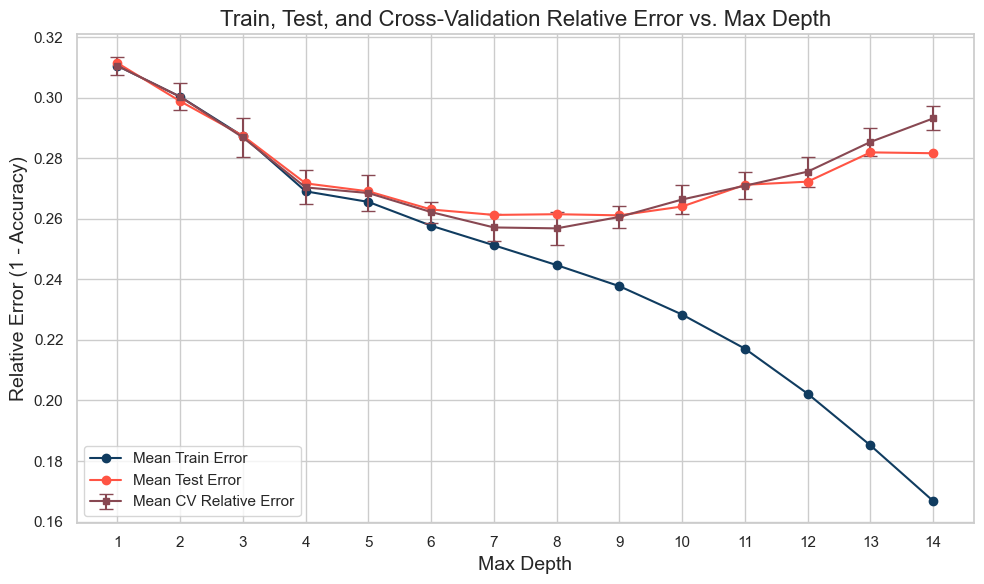

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

mean_train_errors = []
mean_cv_errors = []
std_cv_errors = []
mean_test_errors = []

for depth in range(1, 15):
    cart_model = DecisionTreeClassifier(max_depth=depth, random_state = 9)
    
    # Train the model on the training set
    cart_model.fit(X_train2, y_train2)
    
    # Calculate training error
    train_predictions = cart_model.predict(X_train2)
    train_error = 1 - accuracy_score(y_train2, train_predictions)
    mean_train_errors.append(train_error)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(cart_model, X_train2, y_train2, cv=10, scoring='accuracy')
    
    # Compute relative errors
    relative_errors_cv = 1 - cv_scores
    
    mean_cv_errors.append(np.mean(relative_errors_cv))
    std_cv_errors.append(np.std(relative_errors_cv))
    
    # Calculate test error
    test_predictions = cart_model.predict(X_test2)
    test_error = 1 - accuracy_score(y_test2, test_predictions)
    mean_test_errors.append(test_error)
    
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot training error
plt.plot(
    range(1, 15),
    mean_train_errors,
    '-o',
    label='Mean Train Error',
    color=custom_palette[0]
)

# Plot cross-validation error
plt.errorbar(
    range(1, 15),
    mean_cv_errors,
    yerr=std_cv_errors,
    fmt='-s',
    ecolor='#884852',
    capsize=5,
    capthick=1,
    color='#884852',
    markersize=5,
    label='Mean CV Relative Error'
)

# Plot test error
plt.plot(
    range(1, 15),
    mean_test_errors,
    '-o',
    label='Mean Test Error',
    color=custom_palette[1]
)

plt.title('Train, Test, and Cross-Validation Relative Error vs. Max Depth', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Relative Error (1 - Accuracy)', fontsize=14)
plt.xticks(range(1, 15))
plt.legend()
plt.tight_layout()
plt.show()

### Pruning the tree

    Depth  Mean CV Error  Standard Deviation  Mean CV Error + Std Dev
0       1       0.310504            0.003026                 0.313530
1       2       0.300299            0.004425                 0.304724
2       3       0.286840            0.006372                 0.293211
3       4       0.270350            0.005590                 0.275940
4       5       0.268490            0.005999                 0.274490
5       6       0.262206            0.003491                 0.265697
6       7       0.257133            0.004403                 0.261536
7       8       0.256830            0.005389                 0.262220
8       9       0.260609            0.003508                 0.264118
9      10       0.266369            0.004946                 0.271314
10     11       0.270916            0.004404                 0.275319
11     12       0.275564            0.004953                 0.280517
12     13       0.285365            0.004549                 0.289914
13     14       0.29

DecisionTreeClassifier(max_depth=6, random_state=9)


Classification Report for Pruned Tree:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     10583
         1.0       0.73      0.75      0.74     10625

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train Accuracy of Pruned Tree (depth=6): 0.7423005415892006
Test Accuracy of Pruned Tree (depth=6): 0.7369388909845341


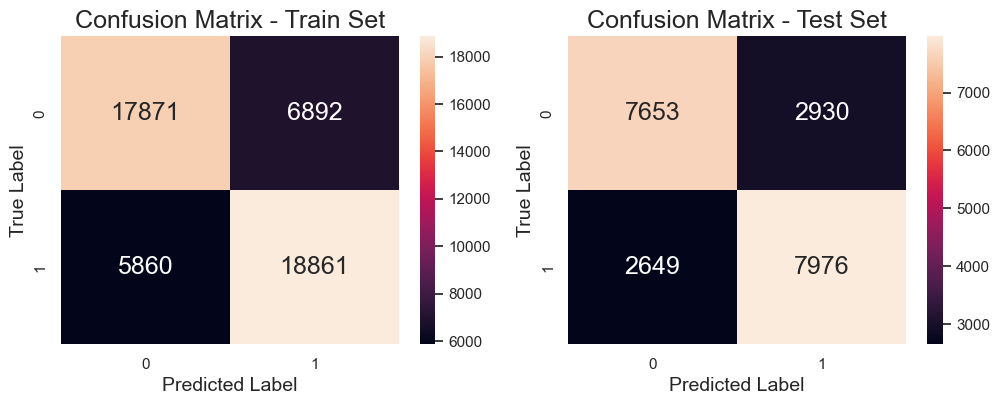

In [34]:
# Assuming mean_cv_errors and std_cv_errors are already populated
depths = list(range(1, 15))  # Depths from 1 to 14
sums = [mean_cv_errors[i - 1] + std_cv_errors[i - 1] for i in depths]

# Create a DataFrame
results_df = pd.DataFrame({
    'Depth': depths,
    'Mean CV Error': mean_cv_errors,
    'Standard Deviation': std_cv_errors,
    'Mean CV Error + Std Dev': sums
})
# Print the DataFrame
print(results_df)

# Identify the depth with the minimum cross-validation error
min_cv_error = np.min(mean_cv_errors)
# find correspoding standard error
min_cv_error_idx = np.argmin(mean_cv_errors)
min_cv_error_std = std_cv_errors[min_cv_error_idx]
# find cv cap
cv_cap = min_cv_error + min_cv_error_std

for depth, error, std in zip(range(1, 15), mean_cv_errors, std_cv_errors):
    if error <= cv_cap:
        optimal_depth2 = depth
        break
        
optimal_depth_min2 = np.argmin(mean_cv_errors) + 1 

print(f'Optimal depth based on least complicated tree with CV error <= CV cap: {optimal_depth2}')
print(f'Optimal depth based on lowest mean CV relative error: {optimal_depth_min2}')

# Train the decision tree using the optimal depth
pruned_cart_model2 = DecisionTreeClassifier(max_depth=optimal_depth2, random_state=9)
pruned_cart_model2.fit(X_train2, y_train2)

# Predictions on train and test sets
y_train_pred_pruned = pruned_cart_model2.predict(X_train2)
y_test_pred_pruned = pruned_cart_model2.predict(X_test2)

# Print classification report for pruned tree
print("\nClassification Report for Pruned Tree:")
print(classification_report(y_test2, y_test_pred_pruned))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train2, y_train_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test2, y_test_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate accuracy for train and test sets
train_accuracy_pruned = accuracy_score(y_train2, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test2, y_test_pred_pruned)
print(f"Train Accuracy of Pruned Tree (depth={optimal_depth2}): {train_accuracy_pruned}")
print(f"Test Accuracy of Pruned Tree (depth={optimal_depth2}): {test_accuracy_pruned}")
plt.show()

Skip plotting the CART model as due to the large depth it will be hard to see anything.

## Random Forest

RandomForestClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73     10583
         1.0       0.72      0.77      0.75     10625

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.9954530757416539
Test set accuracy: 0.7364673708034704


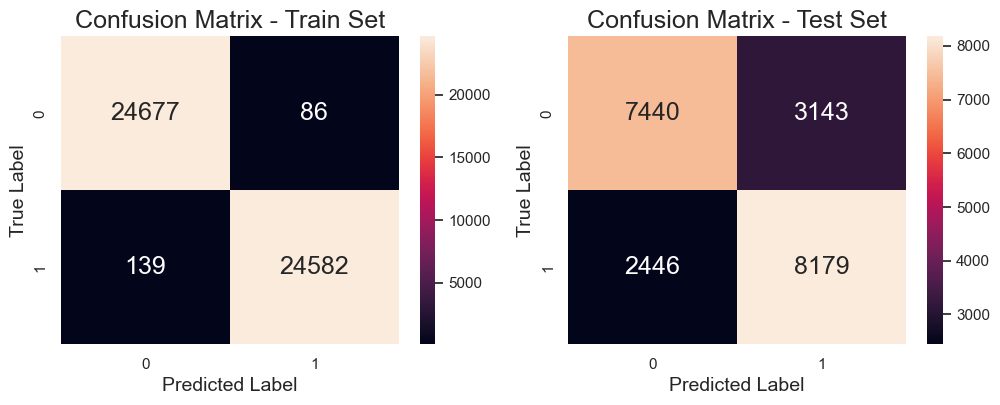

In [49]:

# Initialize the RandomForestClassifier
rf_model2 = RandomForestClassifier(random_state=9)

# Train the model on the training data and let trees grow fully
rf_model2.fit(X_train2, y_train2)

# Predict the class labels for the test set
y_train_pred = rf_model2.predict(X_train2)
y_test_pred = rf_model2.predict(X_test2)

print("\nClassification Report on test set:")
print(classification_report(y_test2, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train2, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test2, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)
# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train2, y_train_pred)
test_accuracy = accuracy_score(y_test2, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


As shown by the accuracies and confusion matrices above for train and test sets, there is clearly overfitting as accuracies of train set are much higher than test set.

### Finding best max_depth using 10 fold cross validation GridSearch

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy', verbose=2)

Best max_depth: 11

Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10583
         1.0       0.73      0.79      0.76     10625

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.7889620887559615
Test set accuracy: 0.747359486986043


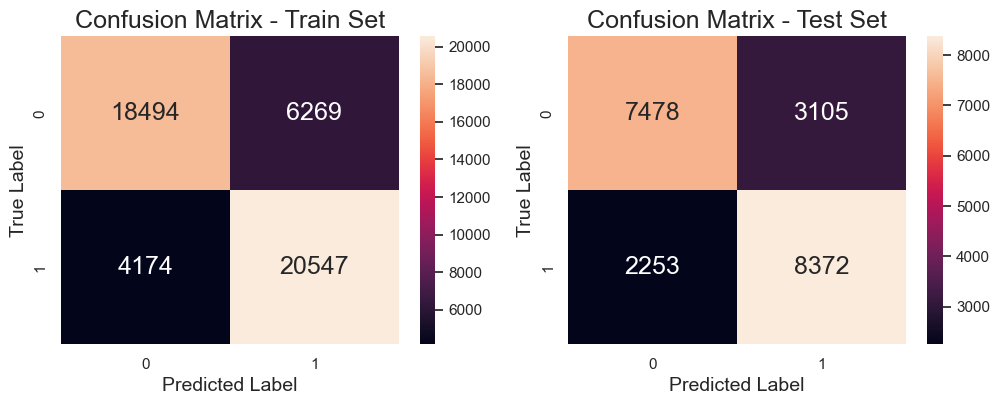

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
}

# Initialize the RandomForestClassifier
rf_model3 = RandomForestClassifier(random_state=9)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model3,
                           param_grid=param_grid,
                           scoring='accuracy',  # or use 'f1', 'roc_auc', etc. depending on your goal
                           cv=10,  # Number of cross-validation folds
                           verbose=2,  # Controls the verbosity of the output
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and the best model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Print the best max_depth
print(f"Best max_depth: {best_max_depth}")

# Evaluate on the training and test set
y_train_pred = best_model.predict(X_train2)
y_test_pred = best_model.predict(X_test2)

print("\nClassification Report on test set:")
print(classification_report(y_test2, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train2, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test2, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)
# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train2, y_train_pred)
test_accuracy = accuracy_score(y_test2, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


## Feature importance for CART and Random Forest

### CART

                 Feature  Importance
9                 HighBP    0.471541
7                GenHlth    0.291518
0                    Age    0.098071
2                    BMI    0.089848
10              HighChol    0.037356
11     HvyAlcoholConsump    0.003958
12                Income    0.003735
17                   Sex    0.001447
4               DiffWalk    0.001387
8   HeartDiseaseorAttack    0.000786
16              PhysHlth    0.000353
5              Education    0.000000
6                 Fruits    0.000000
3              CholCheck    0.000000
1          AnyHealthcare    0.000000
13              MentHlth    0.000000
14           NoDocbcCost    0.000000
15          PhysActivity    0.000000
18                Smoker    0.000000
19                Stroke    0.000000
20               Veggies    0.000000


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance in CART Model')

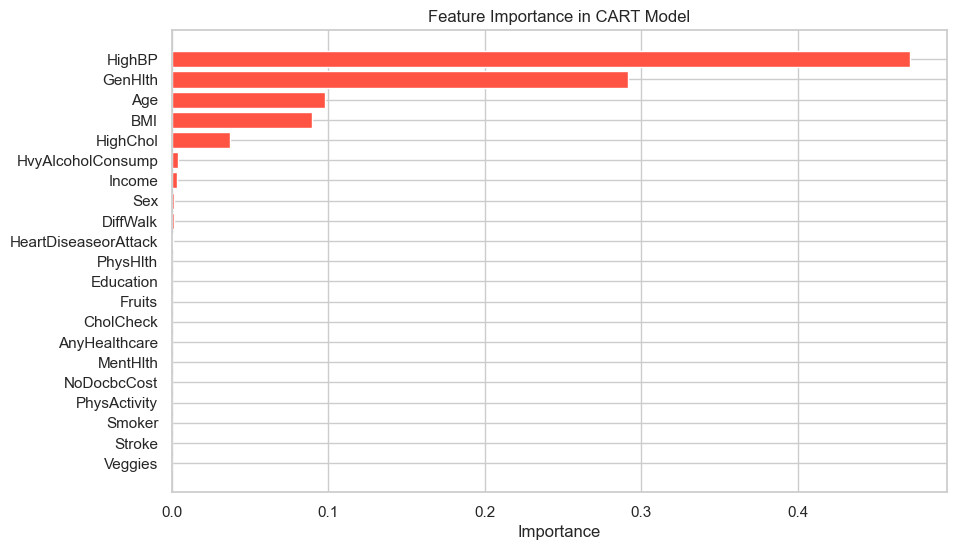

In [37]:
# Get feature importances
feature_importances = pruned_cart_model2.feature_importances_

# Display feature importances with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=custom_palette[1])
plt.xlabel('Importance')
plt.title('Feature Importance in CART Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

### Random Forest

                 Feature  Importance
7                GenHlth    0.235435
9                 HighBP    0.177409
2                    BMI    0.140418
0                    Age    0.101913
10              HighChol    0.084945
4               DiffWalk    0.051393
12                Income    0.038261
16              PhysHlth    0.028999
8   HeartDiseaseorAttack    0.024040
5              Education    0.019523
13              MentHlth    0.018709
15          PhysActivity    0.010820
17                   Sex    0.010673
11     HvyAlcoholConsump    0.010100
3              CholCheck    0.009927
19                Stroke    0.007581
18                Smoker    0.006909
20               Veggies    0.006722
6                 Fruits    0.006547
14           NoDocbcCost    0.005290
1          AnyHealthcare    0.004385


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest Model')

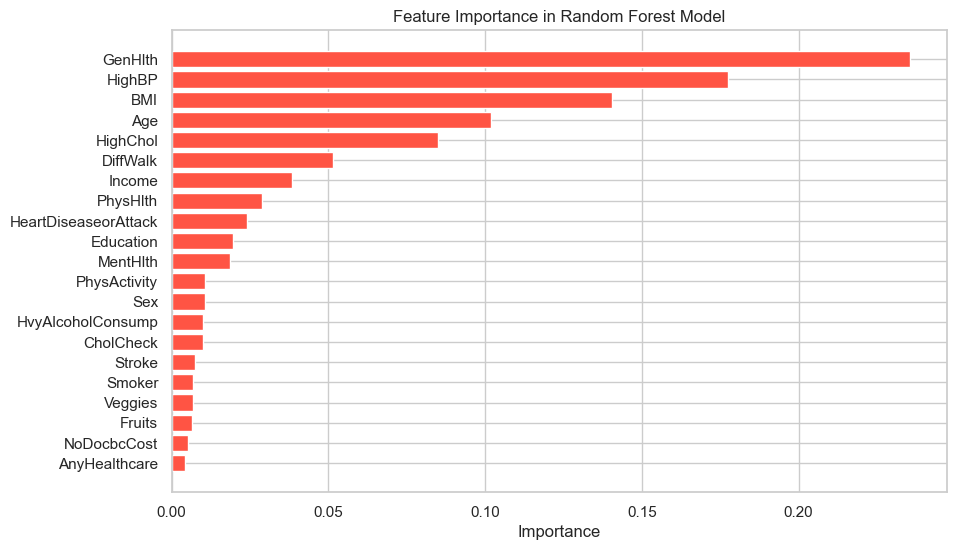

In [38]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train2.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=custom_palette[1])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

## Dropping unimportant variables

In [39]:
# find unimportant variables
threshold = 0.01
CART_unimportant_variables = []
for feature in feature_importance_df["Feature"]:
    if feature_importance_df.loc[feature_importance_df["Feature"] == feature, "Importance"].values[0] < threshold:
        CART_unimportant_variables.append(feature)
print(CART_unimportant_variables)

RF_unimportant_variables = []
for feature in importance_df["Feature"]:
    if importance_df.loc[importance_df["Feature"] == feature, "Importance"].values[0] < threshold:
        RF_unimportant_variables.append(feature)
print(RF_unimportant_variables)

# remove 'Education' since its for US education system
unimportant_intersection = list(set(CART_unimportant_variables) & set(RF_unimportant_variables))
unimportant_intersection.append('Education')
print(unimportant_intersection)

['HvyAlcoholConsump', 'Income', 'Sex', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth', 'Education', 'Fruits', 'CholCheck', 'AnyHealthcare', 'MentHlth', 'NoDocbcCost', 'PhysActivity', 'Smoker', 'Stroke', 'Veggies']
['CholCheck', 'Stroke', 'Smoker', 'Veggies', 'Fruits', 'NoDocbcCost', 'AnyHealthcare']
['Veggies', 'Smoker', 'CholCheck', 'NoDocbcCost', 'Fruits', 'Stroke', 'AnyHealthcare', 'Education']


In [40]:
# drop unimportant variables and retrain models
df3 = df2.drop(columns = unimportant_intersection, inplace = False)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   BMI                   70692 non-null  float64 
 4   HeartDiseaseorAttack  70692 non-null  category
 5   PhysActivity          70692 non-null  category
 6   HvyAlcoholConsump     70692 non-null  category
 7   GenHlth               70692 non-null  category
 8   MentHlth              70692 non-null  float64 
 9   PhysHlth              70692 non-null  float64 
 10  DiffWalk              70692 non-null  category
 11  Sex                   70692 non-null  category
 12  Age                   70692 non-null  category
 13  Income                70692 non-null  category
dtypes: category(11), float64(3)
memory usage: 2.4 MB


In [41]:
# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3[df3.columns.difference(["Diabetes_binary"])], df3["Diabetes_binary"], test_size=0.3, random_state=9)

### Retrain CART

#### Grow the full tree

DecisionTreeClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67     10583
         1.0       0.67      0.64      0.65     10625

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.9715867755234016
Test set accuracy: 0.6622500943040363


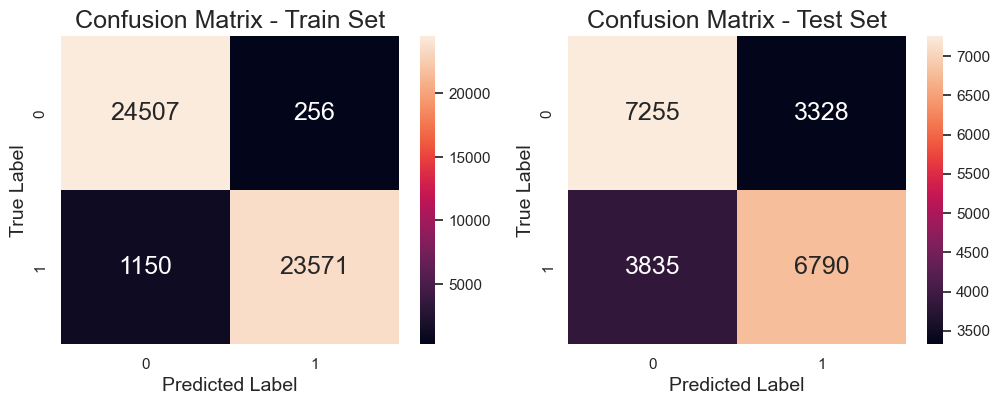

In [42]:
# Initialize the DecisionTreeClassifier (CART)
cart_model3 = DecisionTreeClassifier(random_state=9)

# Train the model on the training data
cart_model3.fit(X_train3, y_train3)

# Predict the class labels for the test set
y_train_pred = cart_model3.predict(X_train3)
y_test_pred = cart_model3.predict(X_test3)

print("\nClassification Report on test set:")
print(classification_report(y_test3, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train3, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test3, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train3, y_train_pred)
test_accuracy = accuracy_score(y_test3, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


#### Finding min CV error

DecisionTreeClassifier(max_depth=1, random_state=9)

DecisionTreeClassifier(max_depth=2, random_state=9)

DecisionTreeClassifier(max_depth=3, random_state=9)

DecisionTreeClassifier(max_depth=4, random_state=9)

DecisionTreeClassifier(max_depth=5, random_state=9)

DecisionTreeClassifier(max_depth=6, random_state=9)

DecisionTreeClassifier(max_depth=7, random_state=9)

DecisionTreeClassifier(max_depth=8, random_state=9)

DecisionTreeClassifier(max_depth=9, random_state=9)

DecisionTreeClassifier(max_depth=10, random_state=9)

DecisionTreeClassifier(max_depth=11, random_state=9)

DecisionTreeClassifier(max_depth=12, random_state=9)

DecisionTreeClassifier(max_depth=13, random_state=9)

DecisionTreeClassifier(max_depth=14, random_state=9)

<Figure size 1000x600 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Train, Test, and Cross-Validation Relative Error vs. Max Depth')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Relative Error (1 - Accuracy)')

([<matplotlib.axis.XTick at 0x1da0d2cd010>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

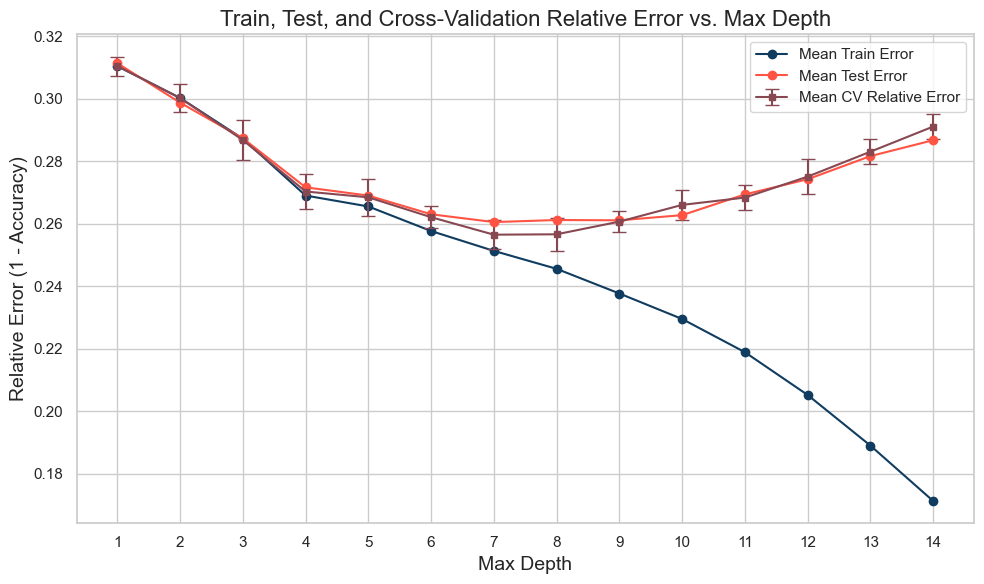

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

mean_train_errors = []
mean_cv_errors = []
std_cv_errors = []
mean_test_errors = []

for depth in range(1, 15):
    cart_model = DecisionTreeClassifier(max_depth=depth, random_state = 9)
    
    # Train the model on the training set
    cart_model.fit(X_train3, y_train3)
    
    # Calculate training error
    train_predictions = cart_model.predict(X_train3)
    train_error = 1 - accuracy_score(y_train3, train_predictions)
    mean_train_errors.append(train_error)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(cart_model, X_train3, y_train3, cv=10, scoring='accuracy')
    
    # Compute relative errors
    relative_errors_cv = 1 - cv_scores
    
    mean_cv_errors.append(np.mean(relative_errors_cv))
    std_cv_errors.append(np.std(relative_errors_cv))
    
    # Calculate test error
    test_predictions = cart_model.predict(X_test3)
    test_error = 1 - accuracy_score(y_test3, test_predictions)
    mean_test_errors.append(test_error)
    
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot training error
plt.plot(
    range(1, 15),
    mean_train_errors,
    '-o',
    label='Mean Train Error',
    color=custom_palette[0]
)

# Plot cross-validation error
plt.errorbar(
    range(1, 15),
    mean_cv_errors,
    yerr=std_cv_errors,
    fmt='-s',
    ecolor='#884852',
    capsize=5,
    capthick=1,
    color='#884852',
    markersize=5,
    label='Mean CV Relative Error'
)

# Plot test error
plt.plot(
    range(1, 15),
    mean_test_errors,
    '-o',
    label='Mean Test Error',
    color=custom_palette[1]
)

plt.title('Train, Test, and Cross-Validation Relative Error vs. Max Depth', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Relative Error (1 - Accuracy)', fontsize=14)
plt.xticks(range(1, 15))
plt.legend()
plt.tight_layout()
plt.show()

#### Pruning the tree

    Depth  Mean CV Error  Standard Deviation  Mean CV Error + Std Dev
0       1       0.310504            0.003026                 0.313530
1       2       0.300299            0.004425                 0.304724
2       3       0.286840            0.006372                 0.293211
3       4       0.270350            0.005590                 0.275940
4       5       0.268490            0.005999                 0.274490
5       6       0.262125            0.003586                 0.265711
6       7       0.256527            0.004560                 0.261087
7       8       0.256648            0.005379                 0.262027
8       9       0.260710            0.003441                 0.264152
9      10       0.266066            0.004891                 0.270956
10     11       0.268410            0.003881                 0.272291
11     12       0.275119            0.005649                 0.280769
12     13       0.283102            0.004040                 0.287142
13     14       0.29

DecisionTreeClassifier(max_depth=7, random_state=9)


Classification Report for Pruned Tree:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10583
         1.0       0.73      0.76      0.74     10625

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train Accuracy of Pruned Tree (depth=7): 0.7486662355508852
Test Accuracy of Pruned Tree (depth=7): 0.7394379479441721


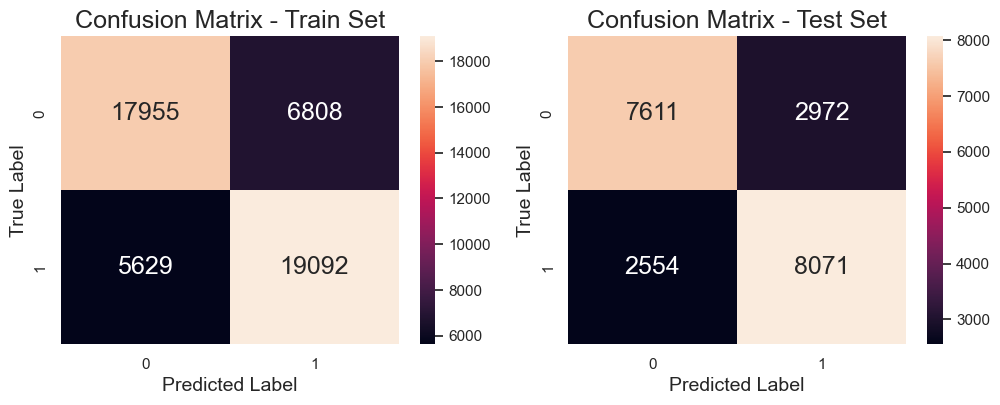

In [44]:
# Assuming mean_cv_errors and std_cv_errors are already populated
depths = list(range(1, 15))  # Depths from 1 to 14
sums = [mean_cv_errors[i - 1] + std_cv_errors[i - 1] for i in depths]

# Create a DataFrame
results_df = pd.DataFrame({
    'Depth': depths,
    'Mean CV Error': mean_cv_errors,
    'Standard Deviation': std_cv_errors,
    'Mean CV Error + Std Dev': sums
})
# Print the DataFrame
print(results_df)

# Identify the depth with the minimum cross-validation error
min_cv_error = np.min(mean_cv_errors)
# find correspoding standard error
min_cv_error_idx = np.argmin(mean_cv_errors)
min_cv_error_std = std_cv_errors[min_cv_error_idx]
# find cv cap
cv_cap = min_cv_error + min_cv_error_std

for depth, error, std in zip(range(1, 15), mean_cv_errors, std_cv_errors):
    if error <= cv_cap:
        optimal_depth3 = depth
        break
        
optimal_depth_min3 = np.argmin(mean_cv_errors) + 1 

print(f'Optimal depth based on least complicated tree with CV error <= CV cap: {optimal_depth3}')
print(f'Optimal depth based on lowest mean CV relative error: {optimal_depth_min3}')

# Train the decision tree using the optimal depth
pruned_cart_model3 = DecisionTreeClassifier(max_depth=optimal_depth3, random_state=9)
pruned_cart_model3.fit(X_train3, y_train3)

# Predictions on train and test sets
y_train_pred_pruned = pruned_cart_model3.predict(X_train3)
y_test_pred_pruned = pruned_cart_model3.predict(X_test3)

# Print classification report for pruned tree
print("\nClassification Report for Pruned Tree:")
print(classification_report(y_test3, y_test_pred_pruned))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train3, y_train_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test3, y_test_pred_pruned),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)

# Calculate accuracy for train and test sets
train_accuracy_pruned = accuracy_score(y_train3, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test3, y_test_pred_pruned)
print(f"Train Accuracy of Pruned Tree (depth={optimal_depth3}): {train_accuracy_pruned}")
print(f"Test Accuracy of Pruned Tree (depth={optimal_depth3}): {test_accuracy_pruned}")
plt.show()

### Retrain Random Forest

RandomForestClassifier(random_state=9)


Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71     10583
         1.0       0.71      0.75      0.73     10625

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.9715665669711422
Test set accuracy: 0.7220388532629196


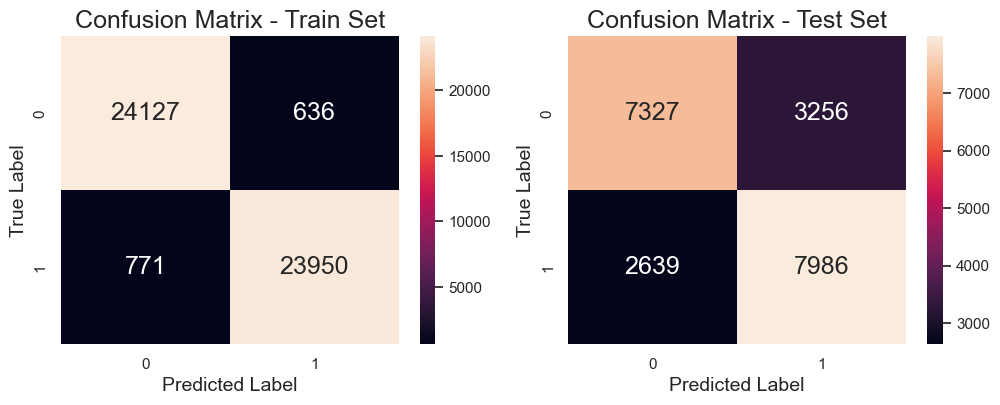

In [45]:
# Initialize the RandomForestClassifier
rf_model4 = RandomForestClassifier(random_state=9)

# Train the model on the training data and let trees grow fully
rf_model4.fit(X_train3, y_train3)

# Predict the class labels for the test set
y_train_pred = rf_model4.predict(X_train3)
y_test_pred = rf_model4.predict(X_test3)

print("\nClassification Report on test set:")
print(classification_report(y_test3, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train3, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test3, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)
# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train3, y_train_pred)
test_accuracy = accuracy_score(y_test3, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))


#### Finding best  max_depth using 10 fold cross validation GridSearch

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy', verbose=2)

Best max_depth: 9

Classification Report on test set:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10583
         1.0       0.73      0.79      0.76     10625

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(117.24999999999999, 0.5, 'True Label')

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

Text(0.5, 11.249999999999995, 'Predicted Label')

Text(624.5227272727271, 0.5, 'True Label')

Train set accuracy: 0.7662476760164901
Test set accuracy: 0.7474537910222557


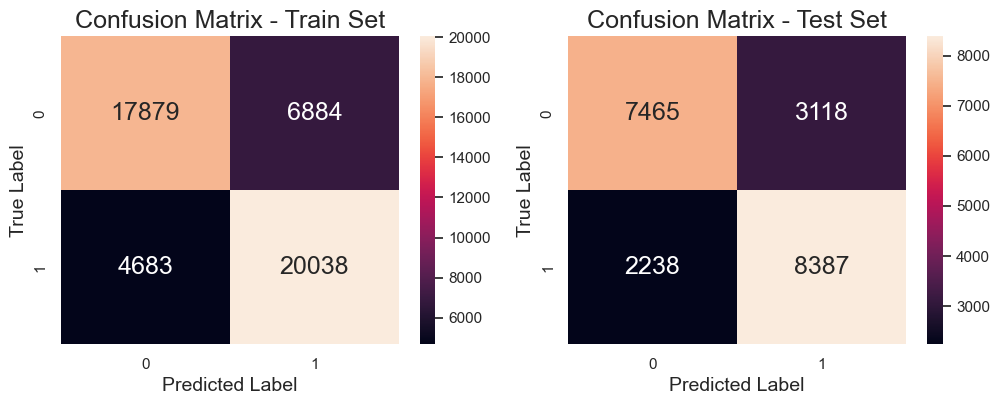

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': [5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15] 
}

# Initialize the RandomForestClassifier
rf_model5 = RandomForestClassifier(random_state=9)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model5,
                           param_grid=param_grid,
                           scoring='accuracy',  # or use 'f1', 'roc_auc', etc. depending on your goal
                           cv=10,  # Number of cross-validation folds
                           verbose=2,  # Controls the verbosity of the output
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train3, y_train3)

# Get the best parameters and the best model
best_max_depth2 = grid_search.best_params_['max_depth']
best_model2 = grid_search.best_estimator_

# Print the best max_depth
print(f"Best max_depth: {best_max_depth2}")

# Evaluate on the training and test set
y_train_pred = best_model2.predict(X_train3)
y_test_pred = best_model2.predict(X_test3)

print("\nClassification Report on test set:")
print(classification_report(y_test3, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train3, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train Set', fontsize=18)
axes[0].set_xlabel('Predicted Label', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=14)
sns.heatmap(confusion_matrix(y_test3, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=18)
axes[1].set_xlabel('Predicted Label', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=14)
# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train3, y_train_pred)
test_accuracy = accuracy_score(y_test3, y_test_pred)
print("Train set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))
